In [1]:
import requests 
import bs4 as bs 
import pandas as pd 

from time import sleep
from time import time
from random import randint

In [ ]:
schs = [str(i) for i in range(1,500)] 

In [ ]:
#create a new dictionary for storing the data
dct = {}
for i in schs:
    dct['schdesc_%s' % i] = []

In [ ]:
#store the data from webpage with school info into a dictionary 
 
for sch in schs:
    source = requests.get('https://www.chsc.hk/ssp2021/sch_detail.php?li_id=2&lang_id=1&chg_district_id=1&sch_id='+ sch, verify=False)
    page_html = bs.BeautifulSoup(source.content, 'html.parser')
    schname = page_html.find_all('dd',class_='xxzl-info-tit')
    dct['schdesc_%s' % sch].append(schname)
    schtable = page_html.find_all('table')
    for table in schtable:
        for row in table.find_all('tr'):
            descs = row.select('td:nth-of-type(2)')[0].text
            dct['schdesc_%s' % sch].append(descs)
    sleep(randint(1, 5))


In [ ]:
for sch in schs:
    print(len(dct['schdesc_%s' % sch]))

In [ ]:
#make the length of list constant
for sch in schs:
    bc = 0
    while len(dct['schdesc_%s' % sch]) < 95 :
        dct['schdesc_%s' % sch].append(bc)

In [ ]:
import pandas as pd
#convert dictionary to dataframe
df = pd.DataFrame(dct).transpose()

In [ ]:
#store data into csv for later use
df.to_csv('df_1.csv')

In [ ]:
#store the data from webpage with school banding
district = ['central-west','eastern','wan-chai','southern','islands','kowloon-city','wong-tai-sin','kwun-tong','yau-tsim-mong','sham-shui-po',
           'kwai-tsing','tsuen-wan','sha-tin','tai-po','sai-kung','tuen-mun','yuen-long','north']

In [ ]:
schname = []
band = []

In [ ]:
for dis in district:
    band_source = requests.get('https://www.schooland.hk/ss/'+ dis)
    band_html = bs.BeautifulSoup(band_source.content, 'html.parser')
    band_table = band_html.find_all('table', class_ = 'school-table')
    for table in band_table:
        for link in table.find_all('a'): 
            schname.append(link.text.strip()) 
        for row in table.find_all("td", attrs={'data-title':'收生'}):
            band.append(row.text.strip())
    sleep(randint(1, 5))


In [ ]:
print(len(schname))
print(len(band))

In [ ]:
band_data = {
    'schname': schname,
    'band': band,
}

In [ ]:
band_df = pd.DataFrame.from_dict(band_data)

In [ ]:
band_df

In [ ]:
band_df.to_csv('band.csv')

In [2]:
df = pd.read_csv('df_1.csv', encoding='utf8')
df.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,85,86,87,88,89,90,91,92,93,94
0,schdesc_1,"[<dd class=""xxzl-info-tit"">\n<br/>\n</dd>]",NaN,NaN,NaN,:\r\n\t\t\t\t\t\t\t\t\n,:\r\n\t\t\t\t\t\t\t\t\n,:\r\n\t\t\t\t\t\t\t\t \n,:\r\n\t\t\t\t\t\t\t\t \n,:\r\n\t\t\t\t\t\t\t\t\n,...,:\r\n\t\t\t\t\t\t\tPlease refer to school web...,NaN,:\r\n\t\t\t\t\t\t\tPlease refer to school web...,:\r\n\t\t\t\t\t\t\tPlease refer to school web...,:\r\n\t\t\t\t\t\t\tPlease refer to school web...,:\r\n\t\t\t\t\t\t\tPlease refer to school web...,:\r\n\t\t\t\t\t\t\tPlease refer to school web...,:\r\n\t\t\t\t\t\t\tPlease refer to school web...,0,0
1,schdesc_2,"[<dd class=""xxzl-info-tit"">\r\n\t\t\t\t拔萃男書院\t...",131 Argyle Street Kowloon,27115191.0,27611026.0,:\r\n\t\t\t\t\t\t\t\tKowloon City\n,:\r\n\t\t\t\t\t\t\t\t\n,:\r\n\t\t\t\t\t\t\t\t -\n,:\r\n\t\t\t\t\t\t\t\tMr. R.K.Y. Cheng \n,:\r\n\t\t\t\t\t\t\t\tDSS\n,...,NaN,:\r\n\t\t\t\t\t\t\tThe school has got Parent-...,:\r\n\t\t\t\t\t\t\tThe school strongly encour...,NaN,:\r\n\t\t\t\t\t\t\tThe school provides a holi...,:\r\n\t\t\t\t\t\t\tThe school provides in-ser...,:\r\n\t\t\t\t\t\t\tThe school has got more th...,:\r\n\t\t\t\t\t\t\tThe School has set up a fu...,":\r\n\t\t\t\t\t\t\tBus: 1, 1A, 2X, 3C, 12A, 2...",:\r\n\t\t\t\t\t\t\tWith the reallocation of r...
2,schdesc_3,"[<dd class=""xxzl-info-tit"">\r\n\t\t\t\t拔萃女書院\t...","1 Jordan Road, Kowloon",22779100.0,27807149.0,:\r\n\t\t\t\t\t\t\t\tYau Tsim Mong\n,:\r\n\t\t\t\t\t\t\t\t\n,":\r\n\t\t\t\t\t\t\t\tMrs. Doris Ho, JP\n",":\r\n\t\t\t\t\t\t\t\tMrs. Stella Lau (SBS, JP...",:\r\n\t\t\t\t\t\t\t\tDSS\n,...,NaN,":\r\n\t\t\t\t\t\t\tAt regular intervals, pare...",:\r\n\t\t\t\t\t\t\tWe help students build mor...,NaN,:\r\n\t\t\t\t\t\t\tThe three areas of concern...,:\r\n\t\t\t\t\t\t\tThe Staff Development Team...,:\r\n\t\t\t\t\t\t\tThe School offers 73 extra...,:\r\n\t\t\t\t\t\t\tScholarships are awarded t...,:\r\n\t\t\t\t\t\t\tThe School is accessible b...,:\r\n\t\t\t\t\t\t\t-\n
3,schdesc_4,"[<dd class=""xxzl-info-tit"">\r\n\t\t\t\t保良局羅傑承（...",Cheung Hong Estate Tsing Yi,24977110.0,24311156.0,:\r\n\t\t\t\t\t\t\t\tKwai Tsing\n,:\r\n\t\t\t\t\t\t\t\tSham Shui Po\n,":\r\n\t\t\t\t\t\t\t\tMr. Ching Nam MA, CStJ, ...",:\r\n\t\t\t\t\t\t\t\tMs. LAW Wing Chung (BSc(...,:\r\n\t\t\t\t\t\t\t\tAided\n,...,:\r\n\t\t\t\t\t\t\tHome-School cooperation is...,:\r\n\t\t\t\t\t\t\tOur school adopts a whole-...,NaN,:\r\n\t\t\t\t\t\t\tMajor Concern 1: To furthe...,:\r\n\t\t\t\t\t\t\tThe principal and teachers...,:\r\n\t\t\t\t\t\t\t1. To emphasize learning b...,:\r\n\t\t\t\t\t\t\tPo Leung Kuk Outstanding S...,":\r\n\t\t\t\t\t\t\tBus: 41, 42, 42A, 43, 43A,...",:\r\n\t\t\t\t\t\t\tAll classes are uniform EM...,0
4,schdesc_5,"[<dd class=""xxzl-info-tit"">\r\n\t\t\t\t保良局百周年李...",Tai Hing Estate Tuen Mun,24623945.0,24533094.0,:\r\n\t\t\t\t\t\t\t\tTuen Mun\n,:\r\n\t\t\t\t\t\t\t\t\n,":\r\n\t\t\t\t\t\t\t\tMr. Ho, Arnaldo Yau Heng\n",:\r\n\t\t\t\t\t\t\t\tMr. Ting Wing Hing (BSC(...,:\r\n\t\t\t\t\t\t\t\tAided\n,...,:\r\n\t\t\t\t\t\t\tThe school values decency ...,NaN,:\r\n\t\t\t\t\t\t\tTo promote a school-wide r...,:\r\n\t\t\t\t\t\t\tTeachers' Development Days...,:\r\n\t\t\t\t\t\t\tThere are over 30 diversif...,:\r\n\t\t\t\t\t\t\tStudents of the school dem...,":\r\n\t\t\t\t\t\t\tBus: 66, 66M, 66X, 960, 96...",:\r\n\t\t\t\t\t\t\t-\n,0,0
5,schdesc_6,"[<dd class=""xxzl-info-tit"">\n<br/>\n</dd>]",NaN,NaN,NaN,:\r\n\t\t\t\t\t\t\t\t\n,:\r\n\t\t\t\t\t\t\t\t\n,:\r\n\t\t\t\t\t\t\t\t \n,:\r\n\t\t\t\t\t\t\t\t \n,:\r\n\t\t\t\t\t\t\t\t\n,...,:\r\n\t\t\t\t\t\t\tPlease refer to school web...,NaN,:\r\n\t\t\t\t\t\t\tPlease refer to school web...,:\r\n\t\t\t\t\t\t\tPlease refer to school web...,:\r\n\t\t\t\t\t\t\tPlease refer to school web...,:\r\n\t\t\t\t\t\t\tPlease refer to school web...,:\r\n\t\t\t\t\t\t\tPlease refer to school web...,:\r\n\t\t\t\t\t\t\tPlease refer to school web...,0,0
6,schdesc_7,"[<dd class=""xxzl-info-tit"">\r\n\t\t\t\t保良局第一張永...",173 Po Kong Village Road Tsz Wan Shan,23212167.0,23284301.0,:\r\n\t\t\t\t\t\t\

In [3]:
#get the variable name

sch_3 = "https://www.chsc.hk/ssp2021/sch_detail.php?li_id=2&lang_id=1&chg_district_id=1&sch_id=3"
schhtml_3 = requests.get(sch_3, verify=False)

page_html_3 = bs.BeautifulSoup(schhtml_3.content, 'html.parser')

schtable_3 = page_html_3.find_all('table')

ty = ['schdesc','name']

for table in schtable_3:
    for row in table.find_all('tr'):
        tys = row.select('td:nth-of-type(1)')[0].text
        ty.append(tys)
        
print(len(ty))

bc=0
ty.append('add1')
ty.append('add2')

num = ['unnamed: 0']

for i in range(0,95):
    num.append(str(i)) 
    
typ = dict(zip(num, ty))

print(typ)

96
{'unnamed: 0': 'schdesc', '0': 'name', '1': 'Address:', '2': 'Phone:\xa0\xa0', '3': 'Fax:\xa0\xa0', '4': 'District', '5': 'Other District(s)', '6': 'Supervisor / Chairman of School Management Committee ', '7': 'Principal (with Qualifications / Experiences)', '8': 'School Type', '9': 'Student Gender', '10': 'Area Occupied by the School', '11': 'Name of Sponsoring Body', '12': 'Incorporated Management Committee', '13': 'Religion', '14': 'Year of Commencement of Operation', '15': 'School Motto', '16': 'Parent-Teacher Association ', '17': 'Student Union / Association', '18': 'Past Students’ Association / School Alumni Association', '19': '\xa0', '20': '\r\n\t\t\t\t\t\t\t  S1\t\t\t\t\t\t\t', '21': '\r\n\t\t\t\t\t\t\t  S2\t\t\t\t\t\t\t', '22': '\r\n\t\t\t\t\t\t\t  S3\t\t\t\t\t\t\t', '23': '\r\n\t\t\t\t\t\t\t  S4\t\t\t\t\t\t\t', '24': '\r\n\t\t\t\t\t\t\t  S5\t\t\t\t\t\t\t', '25': '\r\n\t\t\t\t\t\t\t  S6\t\t\t\t\t\t\t', '26': '\r\n\t\t\t\t\t\t\t  Parent-Teacher Association Fee (Annual) ($):

C:\Users\hs_ch\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.chsc.hk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [4]:
df = df.rename(typ, axis='columns')

In [ ]:
df.head(10)

In [5]:
#drop row with no school
df = df[df['Address:'].notna()]

In [ ]:
df.head(10)

In [6]:
#drop unwanted column
to_drop = ['School Management ','Learning and Teaching Plan ','Student Support']
df.drop(columns=to_drop, inplace=True) 
df.columns

Index(['Unnamed: 0', 'name', 'Address:', 'Phone:  ', 'Fax:  ', 'District',
       'Other District(s)',
       'Supervisor / Chairman of School Management Committee ',
       'Principal (with Qualifications / Experiences)', 'School Type',
       'Student Gender', 'Area Occupied by the School',
       'Name of Sponsoring Body', 'Incorporated Management Committee',
       'Religion', 'Year of Commencement of Operation', 'School Motto',
       'Parent-Teacher Association ', 'Student Union / Association',
       'Past Students’ Association / School Alumni Association', ' ',
       '\r\n\t\t\t\t\t\t\t  S1\t\t\t\t\t\t\t',
       '\r\n\t\t\t\t\t\t\t  S2\t\t\t\t\t\t\t',
       '\r\n\t\t\t\t\t\t\t  S3\t\t\t\t\t\t\t',
       '\r\n\t\t\t\t\t\t\t  S4\t\t\t\t\t\t\t',
       '\r\n\t\t\t\t\t\t\t  S5\t\t\t\t\t\t\t',
       '\r\n\t\t\t\t\t\t\t  S6\t\t\t\t\t\t\t',
       '\r\n\t\t\t\t\t\t\t  Parent-Teacher Association Fee (Annual) ($):\t\t\t\t\t\t\t',
       '\r\n\t\t\t\t\t\t\t  Student Union / Associati

In [7]:
#drop unwanted characters
df = df.replace('\t', '', regex=True)
df = df.replace(':\r', '', regex=True)
df = df.replace('\n', '', regex=True)
df['name'] = df['name'].str.slice(start=28, stop=None)
df = df.replace('<br/>\r', '', regex=True)
df = df.replace('</dd>]', '', regex=True)
df = df.replace('\r', ' ', regex=True)

In [8]:
df.columns = df.columns.str.replace('[\r,\n,\t,]', '', regex=True)

In [9]:
import re
def getChinese(context):
    filtrate = re.compile(u'[^\u4E00-\u9FA5]') # non-Chinese unicode range
    context = filtrate.sub(r'', context) # remove all non-Chinese characters
    return context

df['schname'] = df['name'].apply(getChinese)

In [ ]:
df.head(5)

In [10]:
df = df.set_index('schname')

In [ ]:
df.head(5)

In [11]:
band = pd.read_csv('band.csv', encoding='utf8')
band.head(10)

,Unnamed: 0,schname,band
0,0,聖保羅男女中學,BAND 1
1,1,聖保羅書院,BAND 1
2,2,聖士提反女子中學,BAND 1
3,3,英華女學校,BAND 1
4,4,英皇書院,BAND 1
5,5,高主教書院,BAND 1
6,6,聖嘉勒女書院,BAND 1
7,7,聖若瑟書院,BAND 1
8,8,聖類斯中學,BAND 1
9,9,樂善堂梁銶琚書院,BAND 2


In [12]:
band['schname'] = band['schname'].replace(['衛理中學','香港文理書院','玫瑰崗學校','黃楚標中學','可譽中學','瑪利諾修院學校','九龍文理書院','九龍塘學校','香港兆基創意書院','可立中學'],['衞理中學','文理書院（香港）','玫瑰崗中學','香港教育工作者聯會黃楚標中學','嗇色園主辦可譽中學暨可譽小學','瑪利諾修院學校（中學部）','文理書院（九龍）','九龍塘學校（中學部）','香港兆基創意書院 (李兆基基金會贊助、香港當代文化中心主辦)','可立中學（嗇色園主辦）'])
band['schname'] = band['schname'].replace(['匯基書院東九龍','聖道迦南書院','呂郭碧鳳中學','聖公會梁季彝中學','地利亞修女紀念學校(協和)','地利亞修女紀念學校(協和二中)','九龍華仁書院','李國寶中學','官立嘉道理爵士中學','黃棣珊紀念中學'],['滙基書院（東九龍）','基督教中國佈道會聖道迦南書院','新生命教育協會呂郭碧鳳中學','聖公會梁季彜中學','地利亞修女紀念學校（協和）','地利亞修女紀念學校（協和二中）','華仁書院（九龍）','香港管理專業協會李國寶中學','官立嘉道理爵士中學（西九龍）','香港四邑商工總會黃棣珊紀念中學'])
band['schname'] = band['schname'].replace(['匯基書院','地利亞修女紀念學校(百老匯)','莫慶堯中學','地利亞修女紀念學校(吉利徑)','保良局羅傑承(一九八三)中學','葵涌裘錦秋中學','陳南昌紀念中學','圓玄學院第一中學','李惠利中學','可風中學'],['滙基書院','地利亞修女紀念學校（百老匯）','聖公會聖馬利亞堂莫慶堯中學','地利亞修女紀念學校（吉利徑）','保良局羅傑承（一九八三）中學','裘錦秋中學（葵涌）','香港四邑商工總會陳南昌紀念中學','香港道教聯合會圓玄學院第一中學','循道衞理聯合教會李惠利中學','可風中學（嗇色園主辦）'])
band['schname'] = band['schname'].replace(['何傳耀紀念中學','王少清中學','梁省德中學','胡漢輝中學','王錦輝中小學','沙田循道衛理中學','宣道會鄭榮之中學','馮堯敬紀念中學','陳震夏中學','梁文燕紀念中學(沙田)'],['荃灣公立何傳耀紀念中學','寶安商會王少清中學','博愛醫院歷屆總理聯誼會梁省德中學','紡織學會美國商會胡漢輝中學','香港浸會大學附屬學校王錦輝中小學','沙田循道衞理中學','香港九龍塘基督教中華宣道會鄭榮之中學','香港中國婦女會馮堯敬紀念中學','香港中文大學校友會聯會陳震夏中學','梁文燕紀念中學（沙田）'])
band['schname'] = band['schname'].replace(['圓玄學院第二中學','馮梁結紀念中學','真道書院','圓玄學院第三中學','鄧英喜中學','張沛松紀念中學','馬陳端喜紀念中學','西貢崇真天主教學校','宣道會陳瑞芝紀念中學','馬可賓紀念中學'],['香港道教聯合會圓玄學院第二中學','中華基督教會馮梁結紀念中學','香港華人基督教聯會真道書院','香港道教聯合會圓玄學院第三中學','博愛醫院八十週年鄧英喜中學','威靈頓教育機構張沛松紀念中學','馬錦明慈善基金馬陳端喜紀念中學','西貢崇真天主教學校（中學部）','香港九龍塘基督教中華宣道會陳瑞芝紀念中學','馬錦明慈善基金馬可賓紀念中學'])
band['schname'] = band['schname'].replace(['屯門裘錦秋中學','譚李麗芬紀念中學','可藝中學','元朗信義中學','張煊昌中學','宏信書院','元朗裘錦秋中學','天水圍循道衛理中學','鄧兆棠中學','可道中學'],['裘錦秋中學（屯門）','中華基督教會譚李麗芬紀念中學','嗇色園主辦可藝中學','基督教香港信義會元朗信義中學','香港中文大學校友會聯會張煊昌中學','基督教香港信義會宏信書院','裘錦秋中學（元朗）','天水圍循道衞理中學','元朗公立中學校友會鄧兆棠中學','可道中學（嗇色園主辦）'])
band['schname'] = band['schname'].replace(['陳呂重德紀念中學','湯國華中學','鄧顯紀念中學','風采中學','馬錦燦紀念英文中學'],['圓玄學院妙法寺內明陳呂重德紀念中學','伊利沙伯中學舊生會湯國華中學','香港道教聯合會鄧顯紀念中學','風采中學（教育評議會主辦）','香海正覺蓮社佛教馬錦燦紀念英文中學'])


In [13]:
def getChinese(context):
    filtrate = re.compile(u'[^\u4E00-\u9FA5]') # non-Chinese unicode range
    context = filtrate.sub(r'', context) # remove all non-Chinese characters
    return context

band['schname'] = band['schname'].apply(getChinese)


In [14]:
band['band'] = band['band'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1)
band['band'] = band['band'].astype('str')

In [15]:
band = band.set_index('schname')
band.head(10)

,Unnamed: 0,band
schname,,
聖保羅男女中學,0,1.0
聖保羅書院,1,1.0
聖士提反女子中學,2,1.0
英華女學校,3,1.0
英皇書院,4,1.0
高主教書院,5,1.0
聖嘉勒女書院,6,1.0
聖若瑟書院,7,1.0
聖類斯中學,8,1.0


In [16]:
df_1 = pd.concat([df, band], axis=1)
df_1.head(10)

,Unnamed: 0,name,Address:,Phone:,Fax:,District,Other District(s),Supervisor / Chairman of School Management Committee,Principal (with Qualifications / Experiences),School Type,...,(2) School Ethos,Future Development,(1) School Development Plan,(2) Teacher Professional Training and Development,Life-wide Learning (including Five Essential Learning Experiences to be provided through Key Learning Areas Extra-curricular Activities Co-curricular Activities etc.),Others,Direct public transportation to School,Remarks,Unnamed: 0,band
schname,,,,,,,,,,,,,,,,,,,,,
拔萃男書院,schdesc_2,拔萃男書院Diocesan Boys' School,131 Argyle Street Kowloon,27115191.0,27611026.0,Kowloon City,,-,Mr. R.K.Y. Cheng,DSS,...,The school strongly encourages students to jo...,NaN,The school provides a holistic education base...,The school provides in-service Professional D...,The school has got more than 80 clubs and soc...,The School has set up a fund based on educati...,"Bus: 1, 1A, 2X, 3C, 12A, 24, 27, 42, 81S, 87D...","With the reallocation of resources, DBS has i...",93.0,1.0
拔萃女書院,schdesc_3,拔萃女書院Diocesan Girls' School,"1 Jordan Road, Kowloon",22779100.0,27807149.0,Yau Tsim Mong,,"Mrs. Doris Ho, JP","Mrs. Stella Lau (SBS, JP) BA, PCEd, MEd, Hon...",DSS,...,We help students build moral values based on ...,NaN,The three areas of concern for 2021/22 - 2023...,The Staff Development Team makes yearly plans...,"The School offers 73 extra-curricular clubs, ...",Scholarships are awarded to academically outs...,The School is accessible by the MTR (Jordan S...,-,183.0,1.0
保良局羅傑承一九八三中學,schdesc_4,保良局羅傑承（一九八三）中學Po Leung Kuk Lo Kit Sing (1983) ...,Cheung Hong Estate Tsing Yi,24977110.0,24311156.0,Kwai Tsing,Sham Shui Po,"Mr. Ching Nam MA, CStJ, JP","Ms. LAW Wing Chung (BSc(HKU), PGDE(CUHK), Cer...",Aided,...,NaN,Major Concern 1: To further enhance students’...,The principal and teachers attended overseas ...,"1. To emphasize learning beyond classroom, th...",Po Leung Kuk Outstanding School EDB Hi-Five s...,"Bus: 41, 42, 42A, 43, 43A, 43B, 43C, 43D, 43M...",All classes are uniform EMI (English as the M...,0,234.0,1.0
保良局百周年李兆忠紀念中學,schdesc_5,保良局百周年李兆忠紀念中學Po Leung Kuk Centenary Li Shiu Ch...,Tai Hing Estate Tuen Mun,24623945.0,24533094.0,Tuen Mun,,"Mr. Ho, Arnaldo Yau Heng","Mr. Ting Wing Hing (BSC(HKU), PGCE(HKU), MEd(...",Aided,...,To promote a school-wide reading culture; To ...,Teachers' Development Days are held every yea...,There are over 30 diversified extra-curricula...,Students of the school demonstrate outstandin...,"Bus: 66, 66M, 66X, 960, 961; LRT: 505, 507, 6...",-,0,0,368.0,1.0
保良局第一張永慶中學,schdesc_7,保良局第一張永慶中學Po Leung Kuk No.1 W.H. Cheung College,173 Po Kong Village Road Tsz Wan Shan,23212167.0,23284301.0,Wong Tai Sin,"Kowloon City, Kwun Tong",Mr. Patrick H. C. KWOK,"Mr. CHAU Chor Shing (B.Sc., Cert. Ed., C. Dip...",Aided,...,NaN,1. Nurture competent learners in a caring env...,1. Teachers are encouraged to attend seminars...,A total of 43 clubs and societies have been s...,Our Top three students attained 5** in 5 subj...,"Buses: 2F, 3B, 3C, 3D, 3M, 5C, 116, 203E; Min...",-,0,124.0,1.0
保良局董玉娣中學,schdesc_8,保良局董玉娣中學Po Leung Kuk Tang Yuk Tien College,"Estate Secondary School No. 4, Wu King Estate,...",24631766.0,24616900.0,Tuen Mun,,"Mr. John TONG Chor-nam, JP","Mr. CHEUNG Ka-pong (B.Sc.(Hon), PGCE) (HKU)",Aided,...,1. Further enhance the effectiveness of learn...,"Last year, various courses, seminars/workshop...",PLKTYT aims to provide all our students with ...,The COVID-19 pandemic has brought about huge ...,"Bus: 259D, 59A, 59M, 59X, 962, 962A, 962P, 96...",Other Language: Japanese Other Learning Exper...,0,0,369.0,1.0
保良局何蔭棠中學,schdesc_9,保良局何蔭棠中學Po Leung Kuk Celine Ho Yam Tong College,"176 Po Kong Village Road, School Village, Wong...",26269930.0,26269339.0,Wong Tai Sin,"Kowloon City, Kwun Tong",Mr. Cheng Kam Chung,"Mr Lo Kwok Leung (B.Ed., M.Ed.)",Aided,...,NaN,1. Consolidating self-directed learning. 2. S...,To balance teachers' professionalism and scho...,To enhance pr

In [ ]:
df_1.to_csv('df_merged.csv', encoding='utf8')

In [17]:
#extract target column for text mining
df1 = df_1.iloc[:,67:]

df1.head(50)

,Secondary One Admission,Orientation Activities and Healthy Life,(1)School's Major Concerns,(2) School Management Organisation,(3) Incorporated Management Committee / School Management Committee / Management Committee,(4) School Green Policy,(1) Whole-school Language Policy,(2) Learning and Teaching Strategies,(3) School-based Curriculum,(4) Development of the Four Key Tasks,...,(2) School Ethos,Future Development,(1) School Development Plan,(2) Teacher Professional Training and Development,Life-wide Learning (including Five Essential Learning Experiences to be provided through Key Learning Areas Extra-curricular Activities Co-curricular Activities etc.),Others,Direct public transportation to School,Remarks,Unnamed: 0,band
schname,,,,,,,,,,,,,,,,,,,,,
拔萃男書院,Our school will not participate in the Second...,Our School runs Summer School programs for ne...,Please refer to school website.,"DBS has been established for 152 years, with ...",-,-,DBS adopts English medium of instruction acro...,The school strives to stretch students' schol...,1. Electives: 3X. Please refer to School Webp...,"In Chinese Language, in order to encourage G7...",...,The school strongly encourages students to jo...,NaN,The school provides a holistic education base...,The school provides in-service Professional D...,The school has got more than 80 clubs and soc...,The School has set up a fund based on educati...,"Bus: 1, 1A, 2X, 3C, 12A, 24, 27, 42, 81S, 87D...","With the reallocation of resources, DBS has i...",93.0,1.0
拔萃女書院,Our school will not participate in the Second...,The New Student Orientation Programme and bri...,Please refer to school website.,The School Council leads the School through s...,Please click http://www.dgs.edu.hk/school-pr...,The School issues guidelines on the proper us...,Being bi-literate and trilingual is the basic...,We aim to provide each student with an ideal ...,1. Electives: 3X. The School offers 13 electi...,The School emphasizes the development of crit...,...,We help students build moral values based on ...,NaN,The three areas of concern for 2021/22 - 2023...,The Staff Development Team makes yearly plans...,"The School offers 73 extra-curricular clubs, ...",Scholarships are awarded to academically outs...,The School is accessible by the MTR (Jordan S...,-,183.0,1.0
保良局羅傑承一九八三中學,Our school will accept discretionary places. ...,F.1 Orientation Talk and Orientation Games Da...,1. To further enhance students’ academic perf...,Creative and high efficiency. Our school join...,Our school has adopted the school-based manag...,"With creative and authentic activities, stude...",English has been adopted as the medium of ins...,In order to promote active learning and readi...,1. Electives: 2X and 3X. All F.1 to F.3 stude...,We are a school with vision. We are committed...,...,NaN,Major Concern 1: To further enhance students’...,The principal and teachers attended overseas ...,"1. To emphasize learning beyond classroom, th...",Po Leung Kuk Outstanding School EDB Hi-Five s...,"Bus: 41, 42, 42A, 43, 43A, 43B, 43C, 43D, 43M...",All classes are uniform EMI (English as the M...,0,234.0,1.0
保良局百周年李兆忠紀念中學,Our school will accept discretionary places. ...,Two Orientation Days for both F.1 students an...,To promote a school-wide reading culture; To ...,The Incorporated Management Committee adopts ...,Po Leung Kuk Centenary Li Shiu Chung Memorial...,"To promote environmental protection, we encou...",English is used as the medium of instruction ...,"Being student-centred, we provide opportuniti...",1. Electives: 3X and 4X. Students may choose ...,Reading habits are cultivated through various...,...,To promote a school-wide reading culture; To ...,Teachers' Development Days are held every yea...,There are over 30 diversified extra-curricula...,Students of the school demonstrate outstandin...,"Bus: 66, 66M, 66X, 960, 961; LRT: 505, 507, 6...",-,0,0,368.0,1.0
保良局第一張永慶中學,Our school will accept discretionary places. ...,Our school runs the F.1 New-comer

In [19]:
#organize the data
df1.loc[~((df1['Remarks'] == '0') & (df1['Direct public transportation to School'] == '0')), 'Remarks 2'] = df1['Remarks']
df1.loc[((df1['Remarks'] == '0') & (df1['Direct public transportation to School'] != '0')), 'Remarks 2'] = df1['Direct public transportation to School']
df1.loc[((df1['Remarks'] == '0') & (df1['Direct public transportation to School'] == '0')), 'Remarks 2'] = df1['Others']

df1.loc[~((df1['Remarks'] == '0') & (df1['Direct public transportation to School'] == '0')), 'Direct public transportation to School 2'] = df1['Direct public transportation to School']
df1.loc[((df1['Remarks'] == '0') & (df1['Direct public transportation to School'] != '0')), 'Direct public transportation to School 2'] = df1['Others']
df1.loc[((df1['Remarks'] == '0') & (df1['Direct public transportation to School'] == '0')), 'Direct public transportation to School 2'] = df1.iloc[:,22]

df1.loc[~((df1['Remarks'] == '0') & (df1['Direct public transportation to School'] == '0')), 'Others 2'] = df1['Others']
df1.loc[((df1['Remarks'] == '0') & (df1['Direct public transportation to School'] != '0')), 'Others 2'] = df1.iloc[:,22]

df1.loc[df1['Remarks'] != '0', 'Life-wide Learning 2'] = df1.iloc[:,22]

df1 = df1.drop(df1.columns[22:26], axis=1)

In [6]:
df1.head(10)

,Adopt a different medium of instruction by class or by group / school-based curriculum.3,Secondary One Admission,Orientation Activities and Healthy Life,(1)School's Major Concerns,(2) School Management Organisation,(3) Incorporated Management Committee / School Management Committee / Management Committee,(4) School Green Policy,(1) Whole-school Language Policy,(2) Learning and Teaching Strategies,(3) School-based Curriculum,...,(2) School Ethos,Future Development,(1) School Development Plan,Remarks,Unnamed: 0.1,band,Remarks 2,Direct public transportation to School 2,Others 2,Life-wide Learning 2
0,"Citizenship and Social Development (S.4, S.5)...",Our school will not participate in the Second...,Our School runs Summer School programs for ne...,Please refer to school website.,"DBS has been established for 152 years, with ...",-,-,DBS adopts English medium of instruction acro...,The school strives to stretch students' schol...,1. Electives: 3X. Please refer to School Webp...,...,The school strongly encourages students to jo...,NaN,The school provides a holistic education base...,"With the reallocation of resources, DBS has i...",93.0,1.0,"With the reallocation of resources, DBS has i...","Bus: 1, 1A, 2X, 3C, 12A, 24, 27, 42, 81S, 87D...",The School has set up a fund based on educati...,The school provides in-service Professional D...
1,-,Our school will not participate in the Second...,The New Student Orientation Programme and bri...,Please refer to school website.,The School Council leads the School through s...,Please click http://www.dgs.edu.hk/school-pr...,The School issues guidelines on the proper us...,Being bi-literate and trilingual is the basic...,We aim to provide each student with an ideal ...,1. Electives: 3X. The School offers 13 electi...,...,We help students build moral values based on ...,NaN,The three areas of concern for 2021/22 - 2023...,-,183.0,1.0,-,The School is accessible by the MTR (Jordan S...,Scholarships are awarded to academically outs...,The Staff Development Team makes yearly plans...
2,-,Our school will accept discretionary places. ...,F.1 Orientation Talk and Orientation Games Da...,1. To further enhance students’ academic perf...,Creative and high efficiency. Our school join...,Our school has adopted the school-based manag...,"With creative and authentic activities, stude...",English has been adopted as the medium of ins...,In order to promote active learning and readi...,1. Electives: 2X and 3X. All F.1 to F.3 stude...,...,NaN,Major Concern 1: To further enhance students’...,The principal and teachers attended overseas ...,0,234.0,1.0,All classes are uniform EMI (English as the M...,"Bus: 41, 42, 42A, 43, 43A, 43B, 43C, 43D, 43M...","1. To emphasize learning beyond classroom, th...",NaN
3,-,Our school will accept discretionary places. ...,Two Orientation Days for both F.1 students an...,To promote a school-wide reading culture; To ...,The Incorporated Management Committee adopts ...,Po Leung Kuk Centenary Li Shiu Chung Memorial...,"To promote environmental protection, we encou...",English is used as the medium of instruction ...,"Being student-centred, we provide opportuniti...",1. Electives: 3X and 4X. Students may choose ...,...,To promote a school-wide reading culture; To ...,Teachers' Development Days are held every yea...,There are over 30 diversified extra-curricula...,0,368.0,1.0,-,Students of the school demonstrate outstandin...,NaN,NaN
4,-,Our school will accept discretionary places. ...,Our school runs the F.1 New-comers Counsellin...,We aim at providing an all-round education wh...,"School-based management is in place, with the...",The Incorporated Management Committee has bee...,Our school attaches much importance to School...,The school adopts English as the teaching med...,It has always been our mission to provide a q...,1. Electives: 2X and 3X. Our school offers su...,...,NaN,1. Nurture competent learners in a caring env...,1. Teachers are encouraged to attend seminars...,0,124.0

In [20]:
#drop unwanted columns
to_drop = ['Direct public transportation to School 2','Secondary One Admission','Unnamed: 0']
df1.drop(columns=to_drop, inplace=True) 

In [21]:
#drop NaN
df1 = df1.fillna('')

In [22]:
#join the words into one column for each row

df1['concat'] = df1.apply(lambda x: ','.join(x.dropna()), axis=1)

df1 = df1[~df1.concat.str.contains(",,,,,,,,,,,,,,,,,,,,,", na=False)]
df1['band'] = df1['band'].replace(r'^s*$', float('NaN'), regex = True)
df1['band'] = df1['band'].replace("nan", float('NaN'), regex = True)
df1.dropna(subset = ['band'], inplace = True) 

df1.head(5)

,Orientation Activities and Healthy Life,(1)School's Major Concerns,(2) School Management Organisation,(3) Incorporated Management Committee / School Management Committee / Management Committee,(4) School Green Policy,(1) Whole-school Language Policy,(2) Learning and Teaching Strategies,(3) School-based Curriculum,(4) Development of the Four Key Tasks,(5) Life Planning Education,...,(1) Home-School Co-operation,(2) School Ethos,Future Development,(1) School Development Plan,(2) Teacher Professional Training and Development,band,Remarks 2,Others 2,Life-wide Learning 2,concat
schname,,,,,,,,,,,,,,,,,,,,,
拔萃男書院,Our School runs Summer School programs for ne...,Please refer to school website.,"DBS has been established for 152 years, with ...",-,-,DBS adopts English medium of instruction acro...,The school strives to stretch students' schol...,1. Electives: 3X. Please refer to School Webp...,"In Chinese Language, in order to encourage G7...",https://www.dbs.edu.hk/index.php?s=students&m...,...,The school has got Parent-Teacher Association...,The school strongly encourages students to jo...,,The school provides a holistic education base...,The school provides in-service Professional D...,1.0,"With the reallocation of resources, DBS has i...",The School has set up a fund based on educati...,The school has got more than 80 clubs and soc...,Our School runs Summer School programs for ne...
拔萃女書院,The New Student Orientation Programme and bri...,Please refer to school website.,The School Council leads the School through s...,Please click http://www.dgs.edu.hk/school-pr...,The School issues guidelines on the proper us...,Being bi-literate and trilingual is the basic...,We aim to provide each student with an ideal ...,1. Electives: 3X. The School offers 13 electi...,The School emphasizes the development of crit...,Life Planning and Career Guidance at Diocesan...,...,"At regular intervals, parents are invited to ...",We help students build moral values based on ...,,The three areas of concern for 2021/22 - 2023...,The Staff Development Team makes yearly plans...,1.0,-,Scholarships are awarded to academically outs...,"The School offers 73 extra-curricular clubs, ...",The New Student Orientation Programme and bri...
保良局羅傑承一九八三中學,F.1 Orientation Talk and Orientation Games Da...,1. To further enhance students’ academic perf...,Creative and high efficiency. Our school join...,Our school has adopted the school-based manag...,"With creative and authentic activities, stude...",English has been adopted as the medium of ins...,In order to promote active learning and readi...,1. Electives: 2X and 3X. All F.1 to F.3 stude...,We are a school with vision. We are committed...,"In our school, Life Planning Education plays ...",...,Our school adopts a whole-school approach to ...,,Major Concern 1: To further enhance students’...,The principal and teachers attended overseas ...,"1. To emphasize learning beyond classroom, th...",1.0,All classes are uniform EMI (English as the M...,Po Leung Kuk Outstanding School EDB Hi-Five s...,,F.1 Orientation Talk and Orientation Games Da...
保良局百周年李兆忠紀念中學,Two Orientation Days for both F.1 students an...,To promote a school-wide reading culture; To ...,The Incorporated Management Committee adopts ...,Po Leung Kuk Centenary Li Shiu Chung Memorial...,"To promote environmental protection, we encou...",English is used as the medium of instruction ...,"Being student-centred, we provide opportuniti...",1. Electives: 3X and 4X. Students may choose ...,Reading habits are cultivated through various...,Through different types of programmes about c...,...,,To promote a school-wide reading culture; To ...,Teachers' Development Days are held every yea...,There are over 30 diversified extra-curricula...,Students of the school demonstrate outstandin...,1.0,-,,,Two Orientation Days for both F.1 students an...
保良局第一張永慶中學,Our school runs the F.1 New-comers Counsellin...,We aim at providing an all-round education wh...,"School-based management 

In [23]:
len(df1)

439

In [ ]:
df1['concat'].head(10)

In [24]:
df1['concat'] = df1['concat'].fillna("")

In [25]:
df1_concat = df1[['band','concat']]

In [25]:
df1_concat

,band,concat
schname,,
拔萃男書院,1.0,Our School runs Summer School programs for ne...
拔萃女書院,1.0,The New Student Orientation Programme and bri...
保良局羅傑承一九八三中學,1.0,F.1 Orientation Talk and Orientation Games Da...
保良局百周年李兆忠紀念中學,1.0,Two Orientation Days for both F.1 students an...
保良局第一張永慶中學,1.0,Our school runs the F.1 New-comers Counsellin...
...,...,...
中華基督教青年會中學,2.0,"During summer holidays, home visits will be c..."
中華基金中學,1.0,To help new students to adapt to the new lear...
中華聖潔會靈風中學,3.0,S.1 Bridging course details(1) Academic: S.1 ...


In [26]:
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import Word

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hs_ch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hs_ch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hs_ch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
# for stopword removal
stopwords = nltk.corpus.stopwords.words('english')

# for lemmatization
lemmatizer = WordNetLemmatizer()

In [28]:
# stores temporary documents
docs = []

for line in df1_concat['concat']:    
    # remove url
    line = re.sub(r"http\S+", "", line)
    # tokenization
    tokens = nltk.word_tokenize(line)
    
    # lowercasing and keeps only alphabets
    tokens = [token.lower() for token in tokens if token.isalpha()]

    # stopword removal
    tokens = [token for token in tokens if token not in stopwords]

    # lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    docs.append(" ".join(tokens))
    
# put the processed documents back to variable lines
df1_concat['concat'] = docs

C:\Users\hs_ch\AppData\Local\Temp/ipykernel_28228/3673289512.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_concat['concat'] = docs


In [100]:
df1_concat.to_csv('df1_concat.csv', encoding='utf8')

In [29]:
df1_concat1=df1_concat['concat']

In [29]:
df1_concat1

schname
拔萃男書院            school run summer school program new grade stu...
拔萃女書院            new student orientation programme bridging cou...
保良局羅傑承一九八三中學     orientation talk orientation game day held sep...
保良局百周年李兆忠紀念中學    two orientation day student parent one bridgin...
保良局第一張永慶中學       school run counselling scheme english bridging...
                                       ...                        
中華基督教青年會中學       summer holiday home visit conducted student or...
中華基金中學           help new student adapt new learning environmen...
中華聖潔會靈風中學        bridging course detail academic summer school ...
中聖書院             series orientation event activity provided new...
鐘聲慈善社胡陳金枝中學      order help new form student adapt secondary sc...
Name: concat, Length: 439, dtype: object

# LDA

In [57]:
# import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from itertools import islice

# convert our text data to a DTM
tf_vectorizer = CountVectorizer(stop_words='english')
dtm_df1_concat = tf_vectorizer.fit_transform(df1_concat1)

# display the first 10 vocabs
tf_vectorizer.get_feature_names()[:10]

['aa',
 'ab',
 'abc',
 'abcd',
 'aberdeen',
 'abide',
 'abided',
 'ability',
 'able',
 'abled']

In [58]:
# convert our DTM to a numpy array and display it
dtm_df1_concat.toarray()

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

LDA: 3 topics

In [59]:
# import necessary library
from sklearn.decomposition import LatentDirichletAllocation

# train a latent dirichlet allocation model with 3 topics (n_components)
lda3 = LatentDirichletAllocation(n_components=3, random_state=0)

# fit the dtm into the lda object
lda3.fit(dtm_df1_concat)

LatentDirichletAllocation(n_components=3, random_state=0)

In [60]:
import numpy as np
import pandas as pd

# get the topic-word(term) association for the LDA object
topic_word_matrix = lda3.components_

# retrieve top n_top_words words for each topic
no_top_words = 10
feature_names = tf_vectorizer.get_feature_names()

# create a dataframe for displaying the results
rows = []

for topic_id, topic in enumerate(topic_word_matrix): #for display the top frequent word
    row = ["Topic #" + str(topic_id) + ":"]
    row += [
        feature_names[i] + "|" + str(np.round(topic[i] / np.sum(topic), 10))
        for i in topic.argsort()[:-no_top_words - 1:-1]
    ]
    rows.append(row)

topic_word_df = pd.DataFrame(rows, columns=['Topic', 'Top 1 Word|Prob', 'Top 2 Word|Prob', \
                                            'Top 3 Word|Prob', 'Top 4 Word|Prob', 'Top 5 Word|Prob', \
                                            'Top 6 Word|Prob', 'Top 7 Word|Prob', 'Top 8 Word|Prob', \
                                            'Top 9 Word|Prob', 'Top 10 Word|Prob'])

topic_word_df #display the top frequent words

,Topic,Top 1 Word|Prob,Top 2 Word|Prob,Top 3 Word|Prob,Top 4 Word|Prob,Top 5 Word|Prob,Top 6 Word|Prob,Top 7 Word|Prob,Top 8 Word|Prob,Top 9 Word|Prob,Top 10 Word|Prob
0,Topic #0:,student|0.0311661601,school|0.0248442649,award|0.0219771752,kong|0.0137866399,hong|0.0137481871,competition|0.0134152525,learning|0.0108664761,education|0.0075210872,team|0.0066568368,chinese|0.0064810016
1,Topic #1:,student|0.0550556882,school|0.0332559636,learning|0.0275786518,education|0.0125330228,activity|0.0124262305,teacher|0.0118293997,english|0.0100853592,support|0.009102326,teaching|0.0084905652,curriculum|0.0075478453
2,Topic #2:,student|0.0386286649,school|0.034387768,learning|0.0180894111,education|0.009968956,chinese|0.0087840855,teacher|0.0079664496,fee|0.0079149325,remission|0.0071013974,team|0.0059325069,development|0.0058344923


In [61]:
# document-topic matrix
doc_topic_matrix = lda3.transform(dtm_df1_concat)

# specify the number of topics we're interested in
no_top_topic = 3
rows = []

# process each document
for doc_id, doc in enumerate(doc_topic_matrix):
    row = ['# %d' % doc_id]
    # get the top n topics
    row += [
        'Topic' + str(i) + "|" + str(np.round(doc[i], 3))
        for i in doc.argsort()[:-no_top_topic - 1:-1]
    ]
    rows.append(row)

doc_topic_df = pd.DataFrame(
    rows, columns=['Document', 'Top 1 Topic|Prob', 'Top 2 Topic|Prob', \
                   'Top 3 Topic|Prob'])

doc_topic_df

,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob
0,# 0,Topic1|0.613,Topic2|0.386,Topic0|0.001
1,# 1,Topic1|0.664,Topic2|0.336,Topic0|0.001
2,# 2,Topic0|0.845,Topic1|0.155,Topic2|0.0
3,# 3,Topic1|0.997,Topic0|0.002,Topic2|0.001
4,# 4,Topic1|0.668,Topic0|0.331,Topic2|0.0
...,...,...,...,...
434,# 434,Topic2|0.68,Topic1|0.3,Topic0|0.02
435,# 435,Topic1|0.54,Topic2|0.459,Topic0|0.0
436,# 436,Topic1|0.999,Topic2|0.0,Topic0|0.0
437,# 437,Topic1|0.701,Topic2|0.299,Topic0|0.0


In [62]:
band = pd.DataFrame(df1['band'])
band.reset_index(drop=True, inplace=True)
  
doc_topic_df.reset_index(drop=True, inplace=True)

doc_topic_df = pd.concat([doc_topic_df, band], axis=1)

doc_topic_df.head(5)

,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,band
0,# 0,Topic1|0.613,Topic2|0.386,Topic0|0.001,1.0
1,# 1,Topic1|0.664,Topic2|0.336,Topic0|0.001,1.0
2,# 2,Topic0|0.845,Topic1|0.155,Topic2|0.0,1.0
3,# 3,Topic1|0.997,Topic0|0.002,Topic2|0.001,1.0
4,# 4,Topic1|0.668,Topic0|0.331,Topic2|0.0,1.0


In [63]:
doc_topic_df['Topic'] = doc_topic_df['Top 1 Topic|Prob'].str.get(5)
doc_topic_df.head(10)

,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,band,Topic
0,# 0,Topic1|0.613,Topic2|0.386,Topic0|0.001,1.0,1
1,# 1,Topic1|0.664,Topic2|0.336,Topic0|0.001,1.0,1
2,# 2,Topic0|0.845,Topic1|0.155,Topic2|0.0,1.0,0
3,# 3,Topic1|0.997,Topic0|0.002,Topic2|0.001,1.0,1
4,# 4,Topic1|0.668,Topic0|0.331,Topic2|0.0,1.0,1
5,# 5,Topic1|0.981,Topic0|0.019,Topic2|0.001,1.0,1
6,# 6,Topic1|0.95,Topic0|0.041,Topic2|0.009,1.0,1
7,# 7,Topic1|0.799,Topic0|0.201,Topic2|0.0,2.0,1
8,# 8,Topic1|0.836,Topic0|0.164,Topic2|0.001,2.0,1
9,# 9,Topic1|0.999,Topic2|0.0,Topic0|0.0,2.0,1


In [65]:
pd.crosstab(doc_topic_df['band'],doc_topic_df['Topic'], normalize='index',margins=True)

Topic,0,1,2
band,,,
1.0,0.006536,0.901961,0.091503
2.0,0.033557,0.926174,0.040268
3.0,0.007299,0.970803,0.021898
All,0.015945,0.931663,0.052392


LDA: 5 topics

In [66]:
# train a latent dirichlet allocation model with 5 topics
lda5 = LatentDirichletAllocation(n_components=5, random_state=0)

# fit the dtm into the lda object
lda5.fit(dtm_df1_concat)

LatentDirichletAllocation(n_components=5, random_state=0)

In [67]:
# get the topic-word(term) association for the LDA object
topic_word_matrix = lda5.components_

# retrieve top n_top_words words for each topic
no_top_words = 10
feature_names = tf_vectorizer.get_feature_names()

# create a dataframe for displaying the results
rows = []

for topic_id, topic in enumerate(topic_word_matrix): #for display the top frequent word
    row = ["Topic #" + str(topic_id) + ":"]
    row += [
        feature_names[i] + "|" + str(np.round(topic[i] / np.sum(topic), 10))
        for i in topic.argsort()[:-no_top_words - 1:-1]
    ]
    rows.append(row)

topic_word_df = pd.DataFrame(rows, columns=['Topic', 'Top 1 Word|Prob', 'Top 2 Word|Prob', \
                                            'Top 3 Word|Prob', 'Top 4 Word|Prob', 'Top 5 Word|Prob', \
                                            'Top 6 Word|Prob', 'Top 7 Word|Prob', 'Top 8 Word|Prob', \
                                            'Top 9 Word|Prob', 'Top 10 Word|Prob'])

topic_word_df #display the top frequent words

,Topic,Top 1 Word|Prob,Top 2 Word|Prob,Top 3 Word|Prob,Top 4 Word|Prob,Top 5 Word|Prob,Top 6 Word|Prob,Top 7 Word|Prob,Top 8 Word|Prob,Top 9 Word|Prob,Top 10 Word|Prob
0,Topic #0:,award|0.0309707596,student|0.0273166302,school|0.0239334727,hong|0.0173525389,kong|0.0173394785,competition|0.016848759,champion|0.0075827958,learning|0.0073532349,team|0.0066843702,chinese|0.0066300946
1,Topic #1:,student|0.0552144775,school|0.0331084828,learning|0.0273532188,education|0.0127572198,activity|0.0126145838,teacher|0.0120143834,english|0.0104496692,support|0.0091556049,teaching|0.0086153911,parent|0.0075282823
2,Topic #2:,school|0.0288406264,student|0.0264163475,hong|0.011916845,kong|0.0117650591,education|0.0113367733,learning|0.010368195,award|0.0101648199,competition|0.0092827624,university|0.0075191457,teacher|0.0075158372
3,Topic #3:,bachelor|0.0068043659,spkc|0.0048293913,cuhk|0.0046762137,hku|0.0040403218,average|0.002106321,hons|0.0019892183,percentage|0.00197208,teli|0.0015155221,coursera|0.0015155221,lantau|0.0015139635
4,Topic #4:,student|0.0486703672,school|0.0349934316,learning|0.0252706174,education|0.0097132352,chinese|0.0090799218,teacher|0.0087585359,activity|0.0081605182,curriculum|0.0080664663,development|0.0070322124,support|0.0069011748


In [68]:
# document-topic matrix
doc_topic_matrix = lda5.transform(dtm_df1_concat)

# specify the number of topics we're interested in
no_top_topic = 5
rows = []

# process each document
for doc_id, doc in enumerate(doc_topic_matrix):
    row = ['# %d' % doc_id]
    # get the top n topics
    row += [
        'Topic' + str(i) + "|" + str(np.round(doc[i], 5))
        for i in doc.argsort()[:-no_top_topic - 1:-1]
    ]
    rows.append(row)

doc_topic_df = pd.DataFrame(
    rows, columns=['Document', 'Top 1 Topic|Prob', 'Top 2 Topic|Prob', \
                   'Top 3 Topic|Prob', 'Top 4 Topic|Prob', 'Top 5 Topic|Prob'])

doc_topic_df

,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,Top 4 Topic|Prob,Top 5 Topic|Prob
0,# 0,Topic4|0.75087,Topic1|0.24825,Topic2|0.00029,Topic0|0.00029,Topic3|0.00029
1,# 1,Topic4|0.60217,Topic1|0.34215,Topic2|0.05511,Topic0|0.00028,Topic3|0.00028
2,# 2,Topic0|0.60173,Topic4|0.25745,Topic1|0.14052,Topic2|0.00015,Topic3|0.00015
3,# 3,Topic1|0.99877,Topic0|0.00031,Topic4|0.00031,Topic2|0.00031,Topic3|0.0003
4,# 4,Topic1|0.74558,Topic0|0.23748,Topic4|0.01653,Topic2|0.00021,Topic3|0.0002
...,...,...,...,...,...,...
434,# 434,Topic4|0.54449,Topic2|0.29095,Topic1|0.1642,Topic0|0.00018,Topic3|0.00017
435,# 435,Topic4|0.84779,Topic1|0.15158,Topic0|0.00021,Topic2|0.00021,Topic3|0.0002
436,# 436,Topic1|0.98094,Topic0|0.01844,Topic4|0.00021,Topic2|0.00021,Topic3|0.0002
437,# 437,Topic4|0.61212,Topic1|0.38715,Topic0|0.00025,Topic2|0.00024,Topic3|0.00024


In [69]:
band = pd.DataFrame(df1['band'])
band.reset_index(drop=True, inplace=True)
  
doc_topic_df.reset_index(drop=True, inplace=True)

doc_topic_df = pd.concat([doc_topic_df, band], axis=1)

doc_topic_df.head(5)

,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,Top 4 Topic|Prob,Top 5 Topic|Prob,band
0,# 0,Topic4|0.75087,Topic1|0.24825,Topic2|0.00029,Topic0|0.00029,Topic3|0.00029,1.0
1,# 1,Topic4|0.60217,Topic1|0.34215,Topic2|0.05511,Topic0|0.00028,Topic3|0.00028,1.0
2,# 2,Topic0|0.60173,Topic4|0.25745,Topic1|0.14052,Topic2|0.00015,Topic3|0.00015,1.0
3,# 3,Topic1|0.99877,Topic0|0.00031,Topic4|0.00031,Topic2|0.00031,Topic3|0.0003,1.0
4,# 4,Topic1|0.74558,Topic0|0.23748,Topic4|0.01653,Topic2|0.00021,Topic3|0.0002,1.0


In [70]:
doc_topic_df['Topic'] = doc_topic_df['Top 1 Topic|Prob'].str.get(5)
doc_topic_df.head(10)

,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,Top 4 Topic|Prob,Top 5 Topic|Prob,band,Topic
0,# 0,Topic4|0.75087,Topic1|0.24825,Topic2|0.00029,Topic0|0.00029,Topic3|0.00029,1.0,4
1,# 1,Topic4|0.60217,Topic1|0.34215,Topic2|0.05511,Topic0|0.00028,Topic3|0.00028,1.0,4
2,# 2,Topic0|0.60173,Topic4|0.25745,Topic1|0.14052,Topic2|0.00015,Topic3|0.00015,1.0,0
3,# 3,Topic1|0.99877,Topic0|0.00031,Topic4|0.00031,Topic2|0.00031,Topic3|0.0003,1.0,1
4,# 4,Topic1|0.74558,Topic0|0.23748,Topic4|0.01653,Topic2|0.00021,Topic3|0.0002,1.0,1
5,# 5,Topic1|0.98514,Topic0|0.01406,Topic4|0.00027,Topic2|0.00027,Topic3|0.00026,1.0,1
6,# 6,Topic1|0.98595,Topic2|0.0134,Topic0|0.00022,Topic4|0.00022,Topic3|0.00021,1.0,1
7,# 7,Topic1|0.85694,Topic0|0.14245,Topic4|0.0002,Topic2|0.0002,Topic3|0.0002,2.0,1
8,# 8,Topic1|0.8353,Topic2|0.08394,Topic0|0.08023,Topic4|0.00027,Topic3|0.00026,2.0,1
9,# 9,Topic1|0.99692,Topic4|0.00253,Topic2|0.00019,Topic0|0.00019,Topic3|0.00018,2.0,1


In [71]:
pd.crosstab(doc_topic_df['band'],doc_topic_df['Topic'], normalize='index', margins=True)

Topic,0,1,2,4
band,,,,
1.0,0.006536,0.797386,0.006536,0.189542
2.0,0.006711,0.899329,0.013423,0.080537
3.0,0.000000,0.919708,0.007299,0.072993
All,0.004556,0.870159,0.009112,0.116173


LDA: 10 topics

In [72]:
# train a latent dirichlet allocation model with 10 topics
lda10 = LatentDirichletAllocation(n_components=10, random_state=0)

# fit the dtm into the lda object
lda10.fit(dtm_df1_concat)

LatentDirichletAllocation(random_state=0)

In [73]:
import numpy as np
import pandas as pd

# get the topic-word(term) association for the LDA object
topic_word_matrix = lda10.components_

# retrieve top n_top_words words for each topic
no_top_words = 10
feature_names = tf_vectorizer.get_feature_names()

# create a dataframe for displaying the results
rows = []

for topic_id, topic in enumerate(topic_word_matrix): #for display the top frequent word
    row = ["Topic #" + str(topic_id) + ":"]
    row += [
        feature_names[i] + "|" + str(np.round(topic[i] / np.sum(topic), 10))
        for i in topic.argsort()[:-no_top_words - 1:-1]
    ]
    rows.append(row)

topic_word_df = pd.DataFrame(rows, columns=['Topic', 'Top 1 Word|Prob', 'Top 2 Word|Prob', \
                                            'Top 3 Word|Prob', 'Top 4 Word|Prob', 'Top 5 Word|Prob', \
                                            'Top 6 Word|Prob', 'Top 7 Word|Prob', 'Top 8 Word|Prob', \
                                            'Top 9 Word|Prob', 'Top 10 Word|Prob'])

topic_word_df #display the top frequent words

,Topic,Top 1 Word|Prob,Top 2 Word|Prob,Top 3 Word|Prob,Top 4 Word|Prob,Top 5 Word|Prob,Top 6 Word|Prob,Top 7 Word|Prob,Top 8 Word|Prob,Top 9 Word|Prob,Top 10 Word|Prob
0,Topic #0:,award|0.0436115742,competition|0.026033481,kong|0.0248458958,hong|0.0247784019,student|0.0245278895,school|0.0221326467,champion|0.0123784071,team|0.0077223967,outstanding|0.0073642944,youth|0.0071644684
1,Topic #1:,student|0.0557089964,school|0.0326417581,learning|0.0274568942,education|0.0129910911,activity|0.0127385405,teacher|0.0119737737,english|0.0103674364,support|0.0092602709,teaching|0.0084819856,parent|0.0075995159
2,Topic #2:,school|0.0321147036,student|0.0221140646,learning|0.0122788258,education|0.0122571397,teacher|0.0094490439,award|0.0079906469,hong|0.0078075336,kong|0.0077111894,support|0.0066359662,university|0.0058703968
3,Topic #3:,aerospace|0.0049358107,neuroscience|0.0031174792,presenting|0.0021118536,brunei|0.0021118446,permeates|0.0021118315,vehicle|0.0021109936,hosting|0.0020997905,globe|0.002050502,determine|0.0016411769,geographical|0.001307237
4,Topic #4:,student|0.0492400557,school|0.0358533087,learning|0.0250527365,education|0.0100083921,chinese|0.0094671655,curriculum|0.0084891635,teacher|0.0082646824,activity|0.0077641135,development|0.007330878,support|0.0071366493
5,Topic #5:,corpus|0.0022108019,accessing|0.0011580418,notably|0.0011580391,intake|0.0011580381,locate|0.0011580356,ended|0.0011580355,convenience|0.0011580312,unfurled|0.0011580293,sprinkled|0.0011580293,notwithstanding|0.0011580293
6,Topic #6:,grey|0.0001072846,predecessor|0.0001072846,unhealthy|0.0001072846,exist|0.0001072846,northern|0.0001072846,compromising|0.0001072846,hindi|0.0001072846,kindheartedness|0.0001072846,writes|0.0001072846,reutilization|0.0001072846
7,Topic #7:,htyc|0.0083625262,mr|0.007504558,student|0.006668766,language|0.0044307981,building|0.0042100069,education|0.004128827,training|0.003808323,hong|0.0037437531,english|0.0036984614,chinese|0.0035538336
8,Topic #8:,student|0.0484846562,school|0.0364193875,learning|0.0241822557,teacher|0.0111953677,activity|0.0104838274,education|0.010425733,english|0.009441181,teaching|0.0083777903,chinese|0.0076260241,development|0.0069185349
9,Topic #9:,bachelor|0.0128373705,cuhk|0.0101437483,hku|0.0084855905,average|0.0053868909,percentage|0.0044687802,hons|0.0035936729,interschool|0.0030380067,coursera|0.0027171665,teli|0.0027171665,polyu|0.0026379771


In [74]:
# document-topic matrix
doc_topic_matrix = lda10.transform(dtm_df1_concat)

# specify the number of topics we're interested in
no_top_topic = 10
rows = []

# process each document
for doc_id, doc in enumerate(doc_topic_matrix):
    row = ['# %d' % doc_id]
    # get the top n topics
    row += [
        'Topic' + str(i) + "|" + str(np.round(doc[i], 10))
        for i in doc.argsort()[:-no_top_topic - 1:-1]
    ]
    rows.append(row)

doc_topic_df = pd.DataFrame(
    rows, columns=['Document', 'Top 1 Topic|Prob', 'Top 2 Topic|Prob', \
                   'Top 3 Topic|Prob', 'Top 4 Topic|Prob', 'Top 5 Topic|Prob', \
                   'Top 6 Topic|Prob', 'Top 7 Topic|Prob', 'Top 8 Topic|Prob', \
                   'Top 9 Topic|Prob', 'Top 10 Topic|Prob'])

doc_topic_df

,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,Top 4 Topic|Prob,Top 5 Topic|Prob,Top 6 Topic|Prob,Top 7 Topic|Prob,Top 8 Topic|Prob,Top 9 Topic|Prob,Top 10 Topic|Prob
0,# 0,Topic8|0.6624465847,Topic4|0.3183207418,Topic1|0.0182254126,Topic2|0.0001439139,Topic0|0.0001439111,Topic7|0.0001438962,Topic9|0.0001438849,Topic6|0.0001438849,Topic5|0.0001438849,Topic3|0.0001438849
1,# 1,Topic4|0.3896726848,Topic1|0.3257064065,Topic8|0.2273007901,Topic2|0.0564890592,Topic0|0.0001385262,Topic7|0.0001385165,Topic9|0.0001385042,Topic6|0.0001385042,Topic5|0.0001385042,Topic3|0.0001385042
2,# 2,Topic4|0.6844212679,Topic0|0.314981639,Topic1|7.46486e-05,Topic8|7.46473e-05,Topic2|7.4644e-05,Topic9|7.46364e-05,Topic7|7.46359e-05,Topic5|7.46272e-05,Topic6|7.46269e-05,Topic3|7.46269e-05
3,# 3,Topic1|0.9986484557,Topic4|0.00015021,Topic0|0.0001501962,Topic8|0.0001501902,Topic2|0.0001501776,Topic7|0.0001501694,Topic9|0.0001501504,Topic6|0.0001501502,Topic5|0.0001501502,Topic3|0.0001501502
4,# 4,Topic1|0.7383453284,Topic0|0.1675813204,Topic4|0.0796783737,Topic8|0.0137882729,Topic2|0.0001011341,Topic7|0.0001011194,Topic9|0.0001011142,Topic6|0.0001011122,Topic5|0.0001011122,Topic3|0.0001011122
...,...,...,...,...,...,...,...,...,...,...,...
434,# 434,Topic8|0.7206525839,Topic4|0.2015999694,Topic0|0.077138688,Topic1|8.69812e-05,Topic2|8.69758e-05,Topic7|8.69693e-05,Topic9|8.69628e-05,Topic6|8.69565e-05,Topic5|8.69565e-05,Topic3|8.69565e-05
435,# 435,Topic4|0.8310283876,Topic1|0.1681568574,Topic0|0.0001018651,Topic8|0.0001018616,Topic2|0.0001018547,Topic7|0.0001018399,Topic9|0.0001018346,Topic6|0.000101833,Topic5|0.000101833,Topic3|0.000101833
436,# 436,Topic1|0.9641870645,Topic7|0.0261159387,Topic8|0.0089891385,Topic4|0.0001011391,Topic0|0.0001011352,Topic2|0.0001011333,Topic9|0.0001011141,Topic6|0.0001011122,Topic5|0.0001011122,Topic3|0.0001011122
437,# 437,Topic4|0.5771507124,Topic1|0.4218899555,Topic8|0.0001199357,Topic0|0.0001199284,Topic7|0.0001199257,Topic2|0.0001199242,Topic9|0.0001199058,Topic6|0.0001199041,Topic5|0.0001199041,Topic3|0.0001199041


In [75]:
band = pd.DataFrame(df1['band'])
band.reset_index(drop=True, inplace=True)
  
doc_topic_df.reset_index(drop=True, inplace=True)

doc_topic_df = pd.concat([doc_topic_df, band], axis=1)

doc_topic_df.head(5)

,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,Top 4 Topic|Prob,Top 5 Topic|Prob,Top 6 Topic|Prob,Top 7 Topic|Prob,Top 8 Topic|Prob,Top 9 Topic|Prob,Top 10 Topic|Prob,band
0,# 0,Topic8|0.6624465847,Topic4|0.3183207418,Topic1|0.0182254126,Topic2|0.0001439139,Topic0|0.0001439111,Topic7|0.0001438962,Topic9|0.0001438849,Topic6|0.0001438849,Topic5|0.0001438849,Topic3|0.0001438849,1.0
1,# 1,Topic4|0.3896726848,Topic1|0.3257064065,Topic8|0.2273007901,Topic2|0.0564890592,Topic0|0.0001385262,Topic7|0.0001385165,Topic9|0.0001385042,Topic6|0.0001385042,Topic5|0.0001385042,Topic3|0.0001385042,1.0
2,# 2,Topic4|0.6844212679,Topic0|0.314981639,Topic1|7.46486e-05,Topic8|7.46473e-05,Topic2|7.4644e-05,Topic9|7.46364e-05,Topic7|7.46359e-05,Topic5|7.46272e-05,Topic6|7.46269e-05,Topic3|7.46269e-05,1.0
3,# 3,Topic1|0.9986484557,Topic4|0.00015021,Topic0|0.0001501962,Topic8|0.0001501902,Topic2|0.0001501776,Topic7|0.0001501694,Topic9|0.0001501504,Topic6|0.0001501502,Topic5|0.0001501502,Topic3|0.0001501502,1.0
4,# 4,Topic1|0.7383453284,Topic0|0.1675813204,Topic4|0.0796783737,Topic8|0.0137882729,Topic2|0.0001011341,Topic7|0.0001011194,Topic9|0.0001011142,Topic6|0.0001011122,Topic5|0.0001011122,Topic3|0.0001011122,1.0


In [76]:
doc_topic_df['Topic'] = doc_topic_df['Top 1 Topic|Prob'].str.slice(5, 7, 1)
doc_topic_df['Topic'] = doc_topic_df['Topic'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
doc_topic_df.head(10) 

<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
C:\Users\hs_ch\AppData\Local\Temp/ipykernel_28228/452043555.py:2: DeprecationWarning: invalid escape sequence \d
  doc_topic_df['Topic'] = doc_topic_df['Topic'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,Top 4 Topic|Prob,Top 5 Topic|Prob,Top 6 Topic|Prob,Top 7 Topic|Prob,Top 8 Topic|Prob,Top 9 Topic|Prob,Top 10 Topic|Prob,band,Topic
0,# 0,Topic8|0.6624465847,Topic4|0.3183207418,Topic1|0.0182254126,Topic2|0.0001439139,Topic0|0.0001439111,Topic7|0.0001438962,Topic9|0.0001438849,Topic6|0.0001438849,Topic5|0.0001438849,Topic3|0.0001438849,1.0,8
1,# 1,Topic4|0.3896726848,Topic1|0.3257064065,Topic8|0.2273007901,Topic2|0.0564890592,Topic0|0.0001385262,Topic7|0.0001385165,Topic9|0.0001385042,Topic6|0.0001385042,Topic5|0.0001385042,Topic3|0.0001385042,1.0,4
2,# 2,Topic4|0.6844212679,Topic0|0.314981639,Topic1|7.46486e-05,Topic8|7.46473e-05,Topic2|7.4644e-05,Topic9|7.46364e-05,Topic7|7.46359e-05,Topic5|7.46272e-05,Topic6|7.46269e-05,Topic3|7.46269e-05,1.0,4
3,# 3,Topic1|0.9986484557,Topic4|0.00015021,Topic0|0.0001501962,Topic8|0.0001501902,Topic2|0.0001501776,Topic7|0.0001501694,Topic9|0.0001501504,Topic6|0.0001501502,Topic5|0.0001501502,Topic3|0.0001501502,1.0,1
4,# 4,Topic1|0.7383453284,Topic0|0.1675813204,Topic4|0.0796783737,Topic8|0.0137882729,Topic2|0.0001011341,Topic7|0.0001011194,Topic9|0.0001011142,Topic6|0.0001011122,Topic5|0.0001011122,Topic3|0.0001011122,1.0,1
5,# 5,Topic1|0.8942690976,Topic4|0.0936336332,Topic0|0.0111785553,Topic8|0.000131271,Topic2|0.0001312591,Topic7|0.0001312485,Topic9|0.0001312345,Topic6|0.0001312336,Topic5|0.0001312336,Topic3|0.0001312336,1.0,1
6,# 6,Topic1|0.9637580276,Topic8|0.020483171,Topic0|0.0150195015,Topic9|0.0001056432,Topic4|0.000105626,Topic2|0.0001056216,Topic7|0.0001056184,Topic3|0.0001055974,Topic6|0.0001055966,Topic5|0.0001055966,1.0,1
7,# 7,Topic1|0.8875578239,Topic0|0.1116484198,Topic8|9.92359e-05,Topic4|9.92328e-05,Topic2|9.92282e-05,Topic9|9.92228e-05,Topic7|9.92176e-05,Topic6|9.92064e-05,Topic5|9.92064e-05,Topic3|9.92064e-05,2.0,1
8,# 8,Topic1|0.8751673012,Topic0|0.1006436735,Topic5|0.0232666393,Topic8|0.0001317886,Topic4|0.000131787,Topic2|0.0001317835,Topic9|0.0001317613,Topic7|0.0001317609,Topic6|0.0001317523,Topic3|0.0001317523,2.0,1
9,# 9,Topic1|0.8984290859,Topic8|0.0956636086,Topic7|0.0052685541,Topic4|9.12653e-05,Topic0|9.12613e-05,Topic2|9.12591e-05,Topic9|9.12431e-05,Topic6|9.12409e-05,Topic5|9.12409e-05,Topic3|9.12409e-05,2.0,1


In [77]:
pd.crosstab(doc_topic_df['band'],doc_topic_df['Topic'], normalize='index', margins=True)

Topic,0,1,2,4,8
band,,,,,
1.0,0.000000,0.784314,0.000000,0.163399,0.052288
2.0,0.006711,0.838926,0.000000,0.067114,0.087248
3.0,0.000000,0.846715,0.007299,0.036496,0.109489
All,0.002278,0.822323,0.002278,0.091116,0.082005


LDA: 20 topics

In [78]:
# train a latent dirichlet allocation model with 20 topics
lda20 = LatentDirichletAllocation(n_components=20, random_state=0)

# fit the dtm into the lda object
lda20.fit(dtm_df1_concat)

LatentDirichletAllocation(n_components=20, random_state=0)

In [79]:
import numpy as np
import pandas as pd

# get the topic-word(term) association for the LDA object
topic_word_matrix = lda20.components_

# retrieve top n_top_words words for each topic
no_top_words = 10
feature_names = tf_vectorizer.get_feature_names()

# create a dataframe for displaying the results
rows = []

for topic_id, topic in enumerate(topic_word_matrix): #for display the top frequent word
    row = ["Topic #" + str(topic_id) + ":"]
    row += [
        feature_names[i] + "|" + str(np.round(topic[i] / np.sum(topic), 10))
        for i in topic.argsort()[:-no_top_words - 1:-1]
    ]
    rows.append(row)

topic_word_df = pd.DataFrame(rows, columns=['Topic', 'Top 1 Word|Prob', 'Top 2 Word|Prob', \
                                            'Top 3 Word|Prob', 'Top 4 Word|Prob', 'Top 5 Word|Prob', \
                                            'Top 6 Word|Prob', 'Top 7 Word|Prob', 'Top 8 Word|Prob', \
                                            'Top 9 Word|Prob', 'Top 10 Word|Prob'])

topic_word_df #display the top frequent words

,Topic,Top 1 Word|Prob,Top 2 Word|Prob,Top 3 Word|Prob,Top 4 Word|Prob,Top 5 Word|Prob,Top 6 Word|Prob,Top 7 Word|Prob,Top 8 Word|Prob,Top 9 Word|Prob,Top 10 Word|Prob
0,Topic #0:,parentswho|0.0001072846,grey|0.0001072846,aerobic|0.0001072846,exist|0.0001072846,undergoing|0.0001072846,gauge|0.0001072846,heep|0.0001072846,sarn|0.0001072846,satit|0.0001072846,incessantly|0.0001072846
1,Topic #1:,student|0.0409884542,learning|0.0322090142,school|0.0157291167,education|0.0107507298,teacher|0.010353856,support|0.0088435193,activity|0.008455429,chinese|0.0082620575,form|0.0081793809,award|0.0078724152
2,Topic #2:,parentswho|0.0001072846,grey|0.0001072846,aerobic|0.0001072846,exist|0.0001072846,undergoing|0.0001072846,gauge|0.0001072846,heep|0.0001072846,sarn|0.0001072846,satit|0.0001072846,incessantly|0.0001072846
3,Topic #3:,parentswho|0.0001072846,grey|0.0001072846,aerobic|0.0001072846,exist|0.0001072846,undergoing|0.0001072846,gauge|0.0001072846,heep|0.0001072846,sarn|0.0001072846,satit|0.0001072846,incessantly|0.0001072846
4,Topic #4:,mr|0.0338382873,learning|0.0198803857,student|0.0125832095,klss|0.0110798891,wai|0.0084106196,jp|0.0080145811,school|0.0080090664,support|0.0075721899,manager|0.0068450838,year|0.0061024168
5,Topic #5:,parentswho|0.0001072846,grey|0.0001072846,aerobic|0.0001072846,exist|0.0001072846,undergoing|0.0001072846,gauge|0.0001072846,heep|0.0001072846,sarn|0.0001072846,satit|0.0001072846,incessantly|0.0001072846
6,Topic #6:,parentswho|0.0001072846,grey|0.0001072846,aerobic|0.0001072846,exist|0.0001072846,undergoing|0.0001072846,gauge|0.0001072846,heep|0.0001072846,sarn|0.0001072846,satit|0.0001072846,incessantly|0.0001072846
7,Topic #7:,htyc|0.0363727966,self|0.0086517354,accompanied|0.0076165146,expectation|0.0062807239,commended|0.0044486764,hkage|0.0036572527,elderly|0.003613257,upholding|0.0032440108,coupled|0.0030913549,penetrate|0.0020047998
8,Topic #8:,learning|0.0223979792,student|0.0184592725,school|0.0135124453,team|0.0118596595,programme|0.0097951058,curriculum|0.0058912263,form|0.0058639126,strengthen|0.0048973793,offer|0.0048396362,la|0.0045778628
9,Topic #9:,parentswho|0.0001072846,grey|0.0001072846,aerobic|0.0001072846,exist|0.0001072846,undergoing|0.0001072846,gauge|0.0001072846,heep|0.0001072846,sarn|0.0001072846,satit|0.0001072846,incessantly|0.0001072846


In [80]:
# document-topic matrix
doc_topic_matrix = lda20.transform(dtm_df1_concat)

# specify the number of topics we're interested in
no_top_topic = 20
rows = []

# process each document
for doc_id, doc in enumerate(doc_topic_matrix):
    row = ['# %d' % doc_id]
    # get the top n topics
    row += [
        'Topic' + str(i) + "|" + str(np.round(doc[i], 20))
        for i in doc.argsort()[:-no_top_topic - 1:-1]
    ]
    rows.append(row)

doc_topic_df = pd.DataFrame(
    rows, columns=['Document', 'Top 1 Topic|Prob', 'Top 2 Topic|Prob', \
                   'Top 3 Topic|Prob', 'Top 4 Topic|Prob', 'Top 5 Topic|Prob', \
                   'Top 6 Topic|Prob', 'Top 7 Topic|Prob', 'Top 8 Topic|Prob', \
                   'Top 9 Topic|Prob', 'Top 10 Topic|Prob', 'Top 11 Topic|Prob', \
                   'Top 12 Topic|Prob', 'Top 13 Topic|Prob', 'Top 14 Topic|Prob', \
                   'Top 15 Topic|Prob', 'Top 16 Topic|Prob', 'Top 17 Topic|Prob', \
                   'Top 18 Topic|Prob', 'Top 19 Topic|Prob', 'Top 20 Topic|Prob'])

doc_topic_df

,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,Top 4 Topic|Prob,Top 5 Topic|Prob,Top 6 Topic|Prob,Top 7 Topic|Prob,Top 8 Topic|Prob,Top 9 Topic|Prob,...,Top 11 Topic|Prob,Top 12 Topic|Prob,Top 13 Topic|Prob,Top 14 Topic|Prob,Top 15 Topic|Prob,Top 16 Topic|Prob,Top 17 Topic|Prob,Top 18 Topic|Prob,Top 19 Topic|Prob,Top 20 Topic|Prob
0,# 0,Topic18|0.8233308713584845,Topic15|0.17537416460565583,Topic16|7.19424476212007e-05,Topic1|7.194244749983626e-05,Topic19|7.194244749378093e-05,Topic10|7.194244738929088e-05,Topic8|7.194244675369957e-05,Topic4|7.194244658138412e-05,Topic6|7.194244604337708e-05,...,Topic3|7.194244604337708e-05,Topic5|7.194244604337708e-05,Topic9|7.194244604337708e-05,Topic7|7.194244604337708e-05,Topic11|7.194244604337708e-05,Topic12|7.194244604337708e-05,Topic13|7.194244604337708e-05,Topic14|7.194244604337708e-05,Topic17|7.194244604337708e-05,Topic0|7.194244604337708e-05
1,# 1,Topic18|0.896498880582009,Topic15|0.10225458201437274,Topic16|6.925207909174011e-05,Topic10|6.925207908243536e-05,Topic1|6.925207886556666e-05,Topic19|6.925207876956613e-05,Topic8|6.9252078585899e-05,Topic4|6.92520784722938e-05,Topic6|6.925207756256136e-05,...,Topic3|6.925207756256136e-05,Topic5|6.925207756256136e-05,Topic9|6.925207756256136e-05,Topic7|6.925207756256136e-05,Topic11|6.925207756256136e-05,Topic12|6.925207756256136e-05,Topic13|6.925207756256136e-05,Topic14|6.925207756256136e-05,Topic17|6.925207756256136e-05,Topic0|6.925207756256136e-05
2,# 2,Topic16|0.999291044771605,Topic18|3.731343365592291e-05,Topic10|3.731343356249274e-05,Topic4|3.731343349087408e-05,Topic19|3.731343347822095e-05,Topic1|3.731343345893932e-05,Topic15|3.731343344605274e-05,Topic8|3.731343318040933e-05,Topic7|3.731343292746083e-05,...,Topic2|3.731343283587248e-05,Topic3|3.731343283587248e-05,Topic5|3.731343283587248e-05,Topic9|3.731343283587248e-05,Topic11|3.731343283587248e-05,Topic12|3.731343283587248e-05,Topic13|3.731343283587248e-05,Topic14|3.731343283587248e-05,Topic17|3.731343283587248e-05,Topic0|3.731343283587248e-05
3,# 3,Topic18|0.9796730084984516,Topic16|0.018975640142136894,Topic15|7.507507763224773e-05,Topic1|7.507507664498018e-05,Topic19|7.507507642780748e-05,Topic10|7.507507622265263e-05,Topic4|7.507507577883413e-05,Topic8|7.507507561798431e-05,Topic7|7.507507525976517e-05,...,Topic2|7.507507507520804e-05,Topic3|7.507507507520804e-05,Topic5|7.507507507520804e-05,Topic9|7.507507507520804e-05,Topic11|7.507507507520804e-05,Topic12|7.507507507520804e-05,Topic13|7.507507507520804e-05,Topic14|7.507507507520804e-05,Topic17|7.507507507520804e-05,Topic0|7.507507507520804e-05
4,# 4,Topic18|0.653932347293596,Topic16|0.34515764258959714,Topic19|5.055611856485475e-05,Topic10|5.055611844478248e-05,Topic15|5.055611830957411e-05,Topic1|5.055611830125518e-05,Topic8|5.055611792334488e-05,Topic4|5.055611777895687e-05,Topic6|5.055611729033902e-05,...,Topic3|5.055611729033902e-05,Topic5|5.055611729033902e-05,Topic9|5.055611729033902e-05,Topic7|5.055611729033902e-05,Topic11|5.055611729033902e-05,Topic12|5.055611729033902e-05,Topic13|5.055611729033902e-05,Topic14|5.055611729033902e-05,Topic17|5.055611729033902e-05,Topic0|5.055611729033902e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,# 434,Topic19|0.7131224058035858,Topic18|0.1935795656124364,Topic15|0.09255889814556535,Topic16|4.347826183631178e-05,Topic1|4.347826172226917e-05,Topic10|4.347826165367652e-05,Topic4|4.3478261478027e-05,Topic8|4.347826128721307e-05,Topic6|4.347826086958808e-05,...,Topic3|4.347826086958808e-05,Topic5|4.347826086958808e-05,Topic9|4.347826086958808e-05,Topic7|4.347826086958808e-05,Topic11|4.347826086958808e-05,Topic12|4.347826086958808e-05,Topic13|4.347826086958808e-05,Topic14|4.347826086958808e-05,Topic17|4.347826086958808e-05,Topic0|4.347826086958808e-05
435,# 435,Topic18|0.6481614725392187,Topic16|0.21600359950105114,Topic15|0.1349693475074492,Topic10|5.091649792802931e-05,Topic19|5.091649788570284e-05,Topic1|5.0916497840410

In [81]:
band = pd.DataFrame(df1['band'])
band.reset_index(drop=True, inplace=True)
  
doc_topic_df.reset_index(drop=True, inplace=True)

doc_topic_df = pd.concat([doc_topic_df, band], axis=1)

doc_topic_df.head(5)

,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,Top 4 Topic|Prob,Top 5 Topic|Prob,Top 6 Topic|Prob,Top 7 Topic|Prob,Top 8 Topic|Prob,Top 9 Topic|Prob,...,Top 12 Topic|Prob,Top 13 Topic|Prob,Top 14 Topic|Prob,Top 15 Topic|Prob,Top 16 Topic|Prob,Top 17 Topic|Prob,Top 18 Topic|Prob,Top 19 Topic|Prob,Top 20 Topic|Prob,band
0,# 0,Topic18|0.8233308713584845,Topic15|0.17537416460565583,Topic16|7.19424476212007e-05,Topic1|7.194244749983626e-05,Topic19|7.194244749378093e-05,Topic10|7.194244738929088e-05,Topic8|7.194244675369957e-05,Topic4|7.194244658138412e-05,Topic6|7.194244604337708e-05,...,Topic5|7.194244604337708e-05,Topic9|7.194244604337708e-05,Topic7|7.194244604337708e-05,Topic11|7.194244604337708e-05,Topic12|7.194244604337708e-05,Topic13|7.194244604337708e-05,Topic14|7.194244604337708e-05,Topic17|7.194244604337708e-05,Topic0|7.194244604337708e-05,1.0
1,# 1,Topic18|0.896498880582009,Topic15|0.10225458201437274,Topic16|6.925207909174011e-05,Topic10|6.925207908243536e-05,Topic1|6.925207886556666e-05,Topic19|6.925207876956613e-05,Topic8|6.9252078585899e-05,Topic4|6.92520784722938e-05,Topic6|6.925207756256136e-05,...,Topic5|6.925207756256136e-05,Topic9|6.925207756256136e-05,Topic7|6.925207756256136e-05,Topic11|6.925207756256136e-05,Topic12|6.925207756256136e-05,Topic13|6.925207756256136e-05,Topic14|6.925207756256136e-05,Topic17|6.925207756256136e-05,Topic0|6.925207756256136e-05,1.0
2,# 2,Topic16|0.999291044771605,Topic18|3.731343365592291e-05,Topic10|3.731343356249274e-05,Topic4|3.731343349087408e-05,Topic19|3.731343347822095e-05,Topic1|3.731343345893932e-05,Topic15|3.731343344605274e-05,Topic8|3.731343318040933e-05,Topic7|3.731343292746083e-05,...,Topic3|3.731343283587248e-05,Topic5|3.731343283587248e-05,Topic9|3.731343283587248e-05,Topic11|3.731343283587248e-05,Topic12|3.731343283587248e-05,Topic13|3.731343283587248e-05,Topic14|3.731343283587248e-05,Topic17|3.731343283587248e-05,Topic0|3.731343283587248e-05,1.0
3,# 3,Topic18|0.9796730084984516,Topic16|0.018975640142136894,Topic15|7.507507763224773e-05,Topic1|7.507507664498018e-05,Topic19|7.507507642780748e-05,Topic10|7.507507622265263e-05,Topic4|7.507507577883413e-05,Topic8|7.507507561798431e-05,Topic7|7.507507525976517e-05,...,Topic3|7.507507507520804e-05,Topic5|7.507507507520804e-05,Topic9|7.507507507520804e-05,Topic11|7.507507507520804e-05,Topic12|7.507507507520804e-05,Topic13|7.507507507520804e-05,Topic14|7.507507507520804e-05,Topic17|7.507507507520804e-05,Topic0|7.507507507520804e-05,1.0
4,# 4,Topic18|0.653932347293596,Topic16|0.34515764258959714,Topic19|5.055611856485475e-05,Topic10|5.055611844478248e-05,Topic15|5.055611830957411e-05,Topic1|5.055611830125518e-05,Topic8|5.055611792334488e-05,Topic4|5.055611777895687e-05,Topic6|5.055611729033902e-05,...,Topic5|5.055611729033902e-05,Topic9|5.055611729033902e-05,Topic7|5.055611729033902e-05,Topic11|5.055611729033902e-05,Topic12|5.055611729033902e-05,Topic13|5.055611729033902e-05,Topic14|5.055611729033902e-05,Topic17|5.055611729033902e-05,Topic0|5.055611729033902e-05,1.0


In [82]:
doc_topic_df['Topic'] = doc_topic_df['Top 1 Topic|Prob'].str.slice(5, 7, 1)
doc_topic_df['Topic'] = doc_topic_df['Topic'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
doc_topic_df.head(10) 

<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
C:\Users\hs_ch\AppData\Local\Temp/ipykernel_28228/452043555.py:2: DeprecationWarning: invalid escape sequence \d
  doc_topic_df['Topic'] = doc_topic_df['Topic'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,Top 4 Topic|Prob,Top 5 Topic|Prob,Top 6 Topic|Prob,Top 7 Topic|Prob,Top 8 Topic|Prob,Top 9 Topic|Prob,...,Top 13 Topic|Prob,Top 14 Topic|Prob,Top 15 Topic|Prob,Top 16 Topic|Prob,Top 17 Topic|Prob,Top 18 Topic|Prob,Top 19 Topic|Prob,Top 20 Topic|Prob,band,Topic
0,# 0,Topic18|0.8233308713584845,Topic15|0.17537416460565583,Topic16|7.19424476212007e-05,Topic1|7.194244749983626e-05,Topic19|7.194244749378093e-05,Topic10|7.194244738929088e-05,Topic8|7.194244675369957e-05,Topic4|7.194244658138412e-05,Topic6|7.194244604337708e-05,...,Topic9|7.194244604337708e-05,Topic7|7.194244604337708e-05,Topic11|7.194244604337708e-05,Topic12|7.194244604337708e-05,Topic13|7.194244604337708e-05,Topic14|7.194244604337708e-05,Topic17|7.194244604337708e-05,Topic0|7.194244604337708e-05,1.0,18
1,# 1,Topic18|0.896498880582009,Topic15|0.10225458201437274,Topic16|6.925207909174011e-05,Topic10|6.925207908243536e-05,Topic1|6.925207886556666e-05,Topic19|6.925207876956613e-05,Topic8|6.9252078585899e-05,Topic4|6.92520784722938e-05,Topic6|6.925207756256136e-05,...,Topic9|6.925207756256136e-05,Topic7|6.925207756256136e-05,Topic11|6.925207756256136e-05,Topic12|6.925207756256136e-05,Topic13|6.925207756256136e-05,Topic14|6.925207756256136e-05,Topic17|6.925207756256136e-05,Topic0|6.925207756256136e-05,1.0,18
2,# 2,Topic16|0.999291044771605,Topic18|3.731343365592291e-05,Topic10|3.731343356249274e-05,Topic4|3.731343349087408e-05,Topic19|3.731343347822095e-05,Topic1|3.731343345893932e-05,Topic15|3.731343344605274e-05,Topic8|3.731343318040933e-05,Topic7|3.731343292746083e-05,...,Topic5|3.731343283587248e-05,Topic9|3.731343283587248e-05,Topic11|3.731343283587248e-05,Topic12|3.731343283587248e-05,Topic13|3.731343283587248e-05,Topic14|3.731343283587248e-05,Topic17|3.731343283587248e-05,Topic0|3.731343283587248e-05,1.0,16
3,# 3,Topic18|0.9796730084984516,Topic16|0.018975640142136894,Topic15|7.507507763224773e-05,Topic1|7.507507664498018e-05,Topic19|7.507507642780748e-05,Topic10|7.507507622265263e-05,Topic4|7.507507577883413e-05,Topic8|7.507507561798431e-05,Topic7|7.507507525976517e-05,...,Topic5|7.507507507520804e-05,Topic9|7.507507507520804e-05,Topic11|7.507507507520804e-05,Topic12|7.507507507520804e-05,Topic13|7.507507507520804e-05,Topic14|7.507507507520804e-05,Topic17|7.507507507520804e-05,Topic0|7.507507507520804e-05,1.0,18
4,# 4,Topic18|0.653932347293596,Topic16|0.34515764258959714,Topic19|5.055611856485475e-05,Topic10|5.055611844478248e-05,Topic15|5.055611830957411e-05,Topic1|5.055611830125518e-05,Topic8|5.055611792334488e-05,Topic4|5.055611777895687e-05,Topic6|5.055611729033902e-05,...,Topic9|5.055611729033902e-05,Topic7|5.055611729033902e-05,Topic11|5.055611729033902e-05,Topic12|5.055611729033902e-05,Topic13|5.055611729033902e-05,Topic14|5.055611729033902e-05,Topic17|5.055611729033902e-05,Topic0|5.055611729033902e-05,1.0,18
5,# 5,Topic18|0.9759868038362366,Topic16|0.022832093794314362,Topic19|6.561679946683975e-05,Topic10|6.56167991674291e-05,Topic1|6.56167991596671e-05,Topic15|6.561679902267851e-05,Topic8|6.561679888224801e-05,Topic4|6.561679869507747e-05,Topic7|6.561679815040212e-05,...,Topic5|6.561679790042176e-05,Topic9|6.561679790042176e-05,Topic11|6.561679790042176e-05,Topic12|6.561679790042176e-05,Topic13|6.561679790042176e-05,Topic14|6.561679790042176e-05,Topic17|6.561679790042176e-05,Topic0|6.561679790042176e-05,1.0,18
6,# 6,Topic18|0.7623213593559648,Topic1|0.12440161057857818,Topic19|0.11237945878328162,Topic16|5.279831176763207e-05,Topic10|5.279831154942973e-05,Topic15|5.279831149681401e-05,Topic8|5.279831102365559e-05,Topic4|5.279831088765896e-05,Topic6|5.279831045418737e-05,...,Topic9|5.279831045418737e-05,Topic11|5.279831045418737e-05,Topic12|5.279831045418737e-05,Topic13|5.279831045418737e-05,Topic14|5.279831045418737e-05,Topic17|5.279831045418737e-05,Topic0|5.279831045418737e-05,Topic7|5.279831045418737e-05,1.0,18
7,# 7,Topic18|0.6561419541327894,Topic16|0.3429651887179852,Topic8|4.96031763859

In [83]:
pd.crosstab(doc_topic_df['band'],doc_topic_df['Topic'], normalize='index', margins = True)

Topic,1,10,15,16,18,19
band,,,,,,
1.0,0.006536,0.006536,0.000000,0.052288,0.928105,0.006536
2.0,0.006711,0.006711,0.013423,0.067114,0.892617,0.013423
3.0,0.007299,0.000000,0.000000,0.065693,0.919708,0.007299
All,0.006834,0.004556,0.004556,0.061503,0.913440,0.009112


# NMF

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

# use tfidf by removing tokens that don't appear in at least 3 documents 
# remove the rare token
vect = TfidfVectorizer(min_df=3, stop_words='english')
 
# Fit and transform
X = vect.fit_transform(df1_concat['concat'])

In [87]:
# import necessary library
from sklearn.decomposition import NMF

# Create an NMF instance: model
# the 10 components will be the topics
model = NMF(n_components=10, random_state=5, max_iter=1000)
 
# Fit the model to TF-IDF
model.fit(X)
 
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X)

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())

C:\Users\hs_ch\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [88]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    # Extract the first 10 vocabs representing the topic
    print(tmp.nlargest(20))
    print('\n')

For topic 1 the words with the highest value are:
student      2.284749
activity     0.348607
teacher      0.278148
need         0.236302
subject      0.233699
school       0.220286
class        0.218309
form         0.207187
different    0.205918
help         0.190098
english      0.183847
various      0.173718
support      0.172534
special      0.167271
parent       0.152509
skill        0.140005
program      0.139871
scheme       0.138491
team         0.138113
year         0.134933
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
fee            0.711216
remission      0.697388
school         0.563656
student        0.541875
learning       0.331691
assistance     0.264083
receiving      0.251321
financial      0.249280
chinese        0.215582
family         0.185638
apply          0.157518
income         0.142924
agency         0.134276
sfaa           0.133546
cssa           0.133003
website        0.131525
application    0.127959
security       0.125042
in

In [89]:
import numpy as np
# document-topic matrix

# specify the number of topics we're interested in
no_top_topic = 10
rows = []

# process each document
for doc_id, doc in enumerate(nmf_features):
    row = ['# %d' % doc_id]
    # get the top n topics
    row += [
        'Topic' + str(i) + "|" + str(np.round(doc[i], 10))
        for i in doc.argsort()[:-no_top_topic - 1:-1]
    ]
    rows.append(row)


doc_topic_df = pd.DataFrame(
    rows, columns=['Document', 'Top 1 Topic|Prob', 'Top 2 Topic|Prob', 'Top 3 Topic|Prob', \
                  'Top 4 Topic|Prob', 'Top 5 Topic|Prob', 'Top 6 Topic|Prob', \
                  'Top 7 Topic|Prob', 'Top 8 Topic|Prob', 'Top 9 Topic|Prob', \
                  'Top 10 Topic|Prob'])


doc_topic_df

,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,Top 4 Topic|Prob,Top 5 Topic|Prob,Top 6 Topic|Prob,Top 7 Topic|Prob,Top 8 Topic|Prob,Top 9 Topic|Prob,Top 10 Topic|Prob
0,# 0,Topic1|0.2534676391,Topic3|0.1091509634,Topic0|0.0685605218,Topic4|0.0297666589,Topic7|0.0288751687,Topic5|0.0282197778,Topic9|0.0,Topic8|0.0,Topic6|0.0,Topic2|0.0
1,# 1,Topic1|0.1945976391,Topic3|0.0974215784,Topic6|0.0607377798,Topic8|0.0593692287,Topic0|0.0441502605,Topic7|0.0177878215,Topic9|0.0,Topic5|0.0,Topic4|0.0,Topic2|0.0
2,# 2,Topic2|0.3013376615,Topic9|0.1848920486,Topic3|0.0695464582,Topic0|0.0048960361,Topic8|0.0029860915,Topic7|0.0,Topic6|0.0,Topic5|0.0,Topic4|0.0,Topic1|0.0
3,# 3,Topic0|0.115075912,Topic8|0.1120895871,Topic5|0.0874205533,Topic3|0.0485078884,Topic2|0.0149838718,Topic6|0.0055822814,Topic9|0.0,Topic7|0.0,Topic4|0.0,Topic1|0.0
4,# 4,Topic2|0.1558935713,Topic7|0.1216412648,Topic0|0.1103678476,Topic8|0.0603865656,Topic5|0.0375075289,Topic6|0.0321034506,Topic1|0.0089515546,Topic4|0.0024296177,Topic3|0.0004914627,Topic9|0.0
...,...,...,...,...,...,...,...,...,...,...,...
434,# 434,Topic7|0.3347829011,Topic1|0.0876304129,Topic9|0.0664601769,Topic3|0.0547344235,Topic4|0.0394644709,Topic0|0.016261735,Topic2|0.0055370626,Topic8|0.0,Topic6|0.0,Topic5|0.0
435,# 435,Topic1|0.192038056,Topic6|0.1021105252,Topic3|0.0848470378,Topic2|0.0483215288,Topic5|0.0237493169,Topic0|0.0221685743,Topic8|0.0212504716,Topic4|0.0001264917,Topic9|0.0,Topic7|0.0
436,# 436,Topic6|0.1672470712,Topic5|0.1606415508,Topic8|0.0468585485,Topic0|0.0443085169,Topic3|0.0203776774,Topic4|0.015065648,Topic9|0.0,Topic7|0.0,Topic2|0.0,Topic1|0.0
437,# 437,Topic9|0.2850243404,Topic1|0.1237978752,Topic3|0.1135662471,Topic8|0.0443547174,Topic4|0.0417307266,Topic0|0.0191379699,Topic6|0.0043365316,Topic7|0.0,Topic5|0.0,Topic2|0.0


In [90]:
band = pd.DataFrame(df1['band'])
band.reset_index(drop=True, inplace=True)

doc_topic_df.reset_index(drop=True, inplace=True)

doc_topic_df = pd.concat([doc_topic_df, band], axis=1)

doc_topic_df.head(5)

,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,Top 4 Topic|Prob,Top 5 Topic|Prob,Top 6 Topic|Prob,Top 7 Topic|Prob,Top 8 Topic|Prob,Top 9 Topic|Prob,Top 10 Topic|Prob,band
0,# 0,Topic1|0.2534676391,Topic3|0.1091509634,Topic0|0.0685605218,Topic4|0.0297666589,Topic7|0.0288751687,Topic5|0.0282197778,Topic9|0.0,Topic8|0.0,Topic6|0.0,Topic2|0.0,1.0
1,# 1,Topic1|0.1945976391,Topic3|0.0974215784,Topic6|0.0607377798,Topic8|0.0593692287,Topic0|0.0441502605,Topic7|0.0177878215,Topic9|0.0,Topic5|0.0,Topic4|0.0,Topic2|0.0,1.0
2,# 2,Topic2|0.3013376615,Topic9|0.1848920486,Topic3|0.0695464582,Topic0|0.0048960361,Topic8|0.0029860915,Topic7|0.0,Topic6|0.0,Topic5|0.0,Topic4|0.0,Topic1|0.0,1.0
3,# 3,Topic0|0.115075912,Topic8|0.1120895871,Topic5|0.0874205533,Topic3|0.0485078884,Topic2|0.0149838718,Topic6|0.0055822814,Topic9|0.0,Topic7|0.0,Topic4|0.0,Topic1|0.0,1.0
4,# 4,Topic2|0.1558935713,Topic7|0.1216412648,Topic0|0.1103678476,Topic8|0.0603865656,Topic5|0.0375075289,Topic6|0.0321034506,Topic1|0.0089515546,Topic4|0.0024296177,Topic3|0.0004914627,Topic9|0.0,1.0


In [91]:
doc_topic_df['Topic'] = doc_topic_df['Top 1 Topic|Prob'].str.slice(5, 7, 1)
doc_topic_df['Topic'] = doc_topic_df['Topic'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
doc_topic_df.head(10) 

<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
C:\Users\hs_ch\AppData\Local\Temp/ipykernel_28228/452043555.py:2: DeprecationWarning: invalid escape sequence \d
  doc_topic_df['Topic'] = doc_topic_df['Topic'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,Top 4 Topic|Prob,Top 5 Topic|Prob,Top 6 Topic|Prob,Top 7 Topic|Prob,Top 8 Topic|Prob,Top 9 Topic|Prob,Top 10 Topic|Prob,band,Topic
0,# 0,Topic1|0.2534676391,Topic3|0.1091509634,Topic0|0.0685605218,Topic4|0.0297666589,Topic7|0.0288751687,Topic5|0.0282197778,Topic9|0.0,Topic8|0.0,Topic6|0.0,Topic2|0.0,1.0,1
1,# 1,Topic1|0.1945976391,Topic3|0.0974215784,Topic6|0.0607377798,Topic8|0.0593692287,Topic0|0.0441502605,Topic7|0.0177878215,Topic9|0.0,Topic5|0.0,Topic4|0.0,Topic2|0.0,1.0,1
2,# 2,Topic2|0.3013376615,Topic9|0.1848920486,Topic3|0.0695464582,Topic0|0.0048960361,Topic8|0.0029860915,Topic7|0.0,Topic6|0.0,Topic5|0.0,Topic4|0.0,Topic1|0.0,1.0,2
3,# 3,Topic0|0.115075912,Topic8|0.1120895871,Topic5|0.0874205533,Topic3|0.0485078884,Topic2|0.0149838718,Topic6|0.0055822814,Topic9|0.0,Topic7|0.0,Topic4|0.0,Topic1|0.0,1.0,0
4,# 4,Topic2|0.1558935713,Topic7|0.1216412648,Topic0|0.1103678476,Topic8|0.0603865656,Topic5|0.0375075289,Topic6|0.0321034506,Topic1|0.0089515546,Topic4|0.0024296177,Topic3|0.0004914627,Topic9|0.0,1.0,2
5,# 5,Topic0|0.1368616227,Topic6|0.0890659069,Topic5|0.0834002693,Topic4|0.040836608,Topic8|0.0322817094,Topic3|0.0221913721,Topic9|0.0219010017,Topic2|0.0111661734,Topic7|0.0090905959,Topic1|0.0,1.0,0
6,# 6,Topic0|0.1006609829,Topic7|0.0977928039,Topic5|0.0924640405,Topic4|0.0867576782,Topic8|0.0404747753,Topic9|0.0143122436,Topic1|0.0097712364,Topic6|0.0,Topic3|0.0,Topic2|0.0,1.0,0
7,# 7,Topic2|0.106519206,Topic0|0.105210635,Topic5|0.0999914535,Topic6|0.0783066459,Topic4|0.0660079069,Topic9|0.0317509518,Topic8|0.0,Topic7|0.0,Topic3|0.0,Topic1|0.0,2.0,2
8,# 8,Topic5|0.136678563,Topic2|0.1026332948,Topic6|0.079377765,Topic3|0.051548038,Topic8|0.0413685532,Topic4|0.0412337744,Topic7|0.0247876582,Topic9|0.0,Topic1|0.0,Topic0|0.0,2.0,5
9,# 9,Topic5|0.1017388277,Topic6|0.082917232,Topic0|0.0778587653,Topic8|0.0749822357,Topic4|0.0673811373,Topic3|0.0579307404,Topic9|0.0,Topic7|0.0,Topic2|0.0,Topic1|0.0,2.0,5


In [92]:
band_t = pd.crosstab(doc_topic_df['band'],doc_topic_df['Topic'],margins=True)
band_t

Topic,0,1,2,3,4,5,6,7,8,9,All
band,,,,,,,,,,,
1.0,15,21,13,20,11,9,25,3,27,9,153
2.0,15,13,19,17,29,15,25,5,7,4,149
3.0,9,11,14,32,44,11,7,1,2,6,137
All,39,45,46,69,84,35,57,9,36,19,439


In [93]:
band_t1 = pd.crosstab(doc_topic_df['band'],doc_topic_df['Topic'], normalize='index')
band_t1

Topic,0,1,2,3,4,5,6,7,8,9
band,,,,,,,,,,
1.0,0.098039,0.137255,0.084967,0.130719,0.071895,0.058824,0.163399,0.019608,0.176471,0.058824
2.0,0.100671,0.087248,0.127517,0.114094,0.194631,0.100671,0.167785,0.033557,0.046980,0.026846
3.0,0.065693,0.080292,0.102190,0.233577,0.321168,0.080292,0.051095,0.007299,0.014599,0.043796


In [94]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(band_t)
print("Chi square",stat,"p-value",p)

Chi square 78.18176527605819 p-value 3.5947546374106305e-06


In [96]:
band_t1 = pd.crosstab(doc_topic_df['band'],doc_topic_df['Topic'], normalize='index',margins=True)
band_t1.columns = ['1','2','3','4','5','6','7','8','9','10']
band_t1.index = ['1','2','3','All']
band_t1

,1,2,3,4,5,6,7,8,9,10
1,0.098039,0.137255,0.084967,0.130719,0.071895,0.058824,0.163399,0.019608,0.176471,0.058824
2,0.100671,0.087248,0.127517,0.114094,0.194631,0.100671,0.167785,0.033557,0.046980,0.026846
3,0.065693,0.080292,0.102190,0.233577,0.321168,0.080292,0.051095,0.007299,0.014599,0.043796
All,0.088838,0.102506,0.104784,0.157175,0.191344,0.079727,0.129841,0.020501,0.082005,0.043280


Text(0, 0.5, 'Proportion')

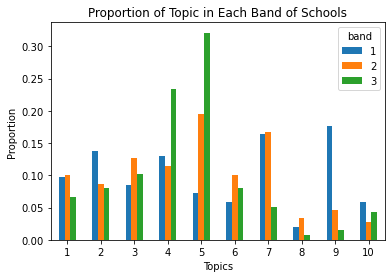

In [42]:
import matplotlib.pyplot as plt

barplot = band_t1.transpose().plot.bar(rot=0)
plt.title("Proportion of Topic in Each Band of Schools")
plt.legend(title = "band")
plt.xlabel("Topics")
plt.ylabel("Proportion")

In [52]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [53]:
tfidf_feature_names = vect.get_feature_names()
n_top_words = 20

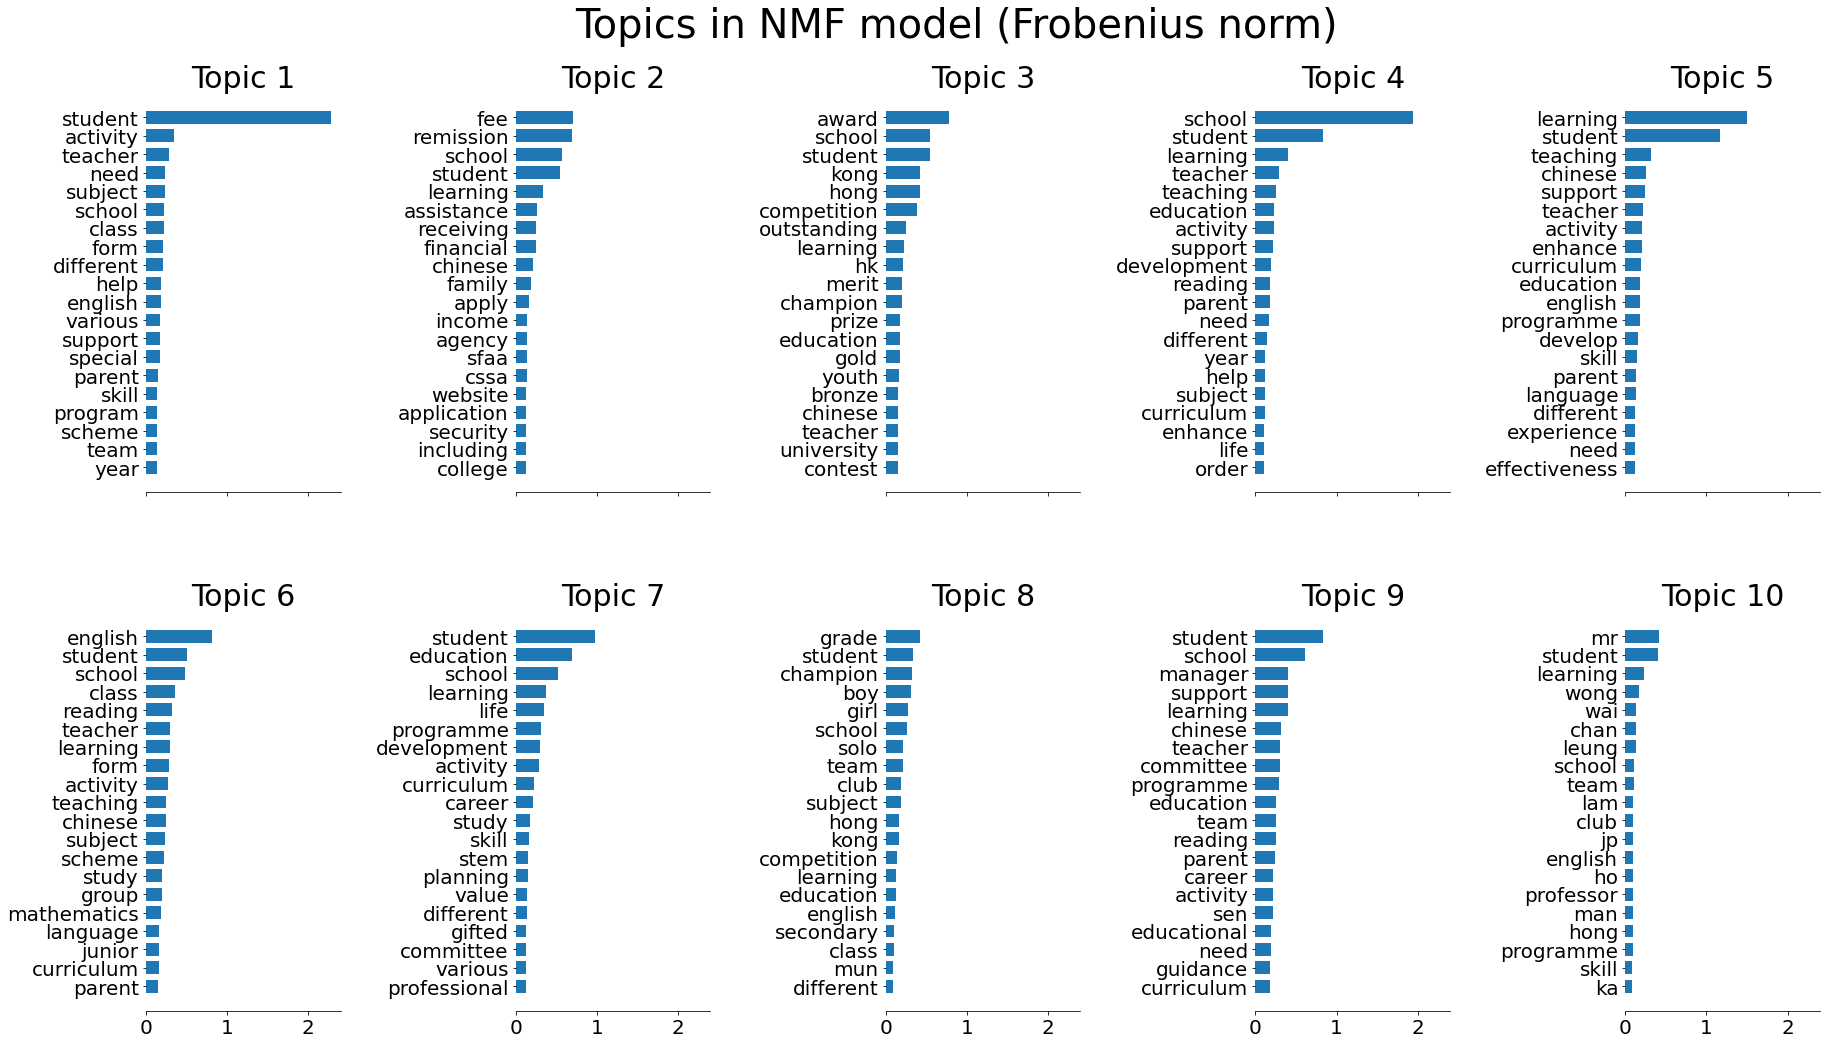

In [54]:
plot_top_words(
    model, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

In [98]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

In [56]:
import pyLDAvis.sklearn
nmf_vis_data = pyLDAvis.sklearn.prepare(model, X, vect)
pyLDAvis.display(nmf_vis_data)

C:\Users\hs_ch\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


How many topics is the best?

In [87]:
import gensim
df1_concat1 = df1_concat['concat']

df1_concat1 = [d.split() for d in df1_concat1]
dictionary = gensim.corpora.dictionary.Dictionary(df1_concat1)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in df1_concat1]


In [88]:
# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 75 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = gensim.models.Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = gensim.models.coherencemodel.CoherenceModel(
        model=nmf,
        texts=df1_concat1,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
scores

[(5, 0.25082),
 (10, 0.29448),
 (15, 0.31323),
 (20, 0.33069),
 (25, 0.31569),
 (30, 0.30705),
 (35, 0.30508),
 (40, 0.29955),
 (45, 0.29952),
 (50, 0.28614),
 (55, 0.29896),
 (60, 0.28885),
 (65, 0.28771),
 (70, 0.28193),
 (75, 0.29613)]

Text(0, 0.5, 'Coherence Score')

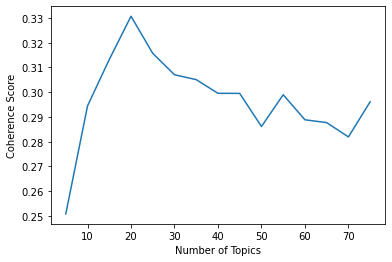

In [90]:
import matplotlib.pyplot as plt

plt.plot(topic_nums, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")

NMF model (20 topics)

In [34]:
# use tfidf by removing tokens that don't appear in at least 3 documents 
# remove the rare token
vect = TfidfVectorizer(min_df=3, stop_words='english')
 
# Fit and transform
X = vect.fit_transform(df1_concat['concat'])

In [35]:
# import necessary library
from sklearn.decomposition import NMF

# Create an NMF instance: model
# the 10 components will be the topics
model = NMF(n_components=20, random_state=5, max_iter=1000)
 
# Fit the model to TF-IDF
model.fit(X)
 
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X)

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())

C:\Users\hs_ch\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [36]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    # Extract the first 20 vocabs representing the topic
    print(tmp.nlargest(20))
    print('\n')

For topic 1 the words with the highest value are:
student        2.468109
activity       0.381124
learning       0.348610
different      0.221299
help           0.211035
various        0.183161
skill          0.182427
form           0.181438
develop        0.173059
life           0.171140
english        0.166152
subject        0.153154
ability        0.145357
development    0.137094
learn          0.136617
class          0.133087
enhance        0.127585
better         0.125609
need           0.122813
positive       0.120131
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
fee            0.754741
remission      0.742015
school         0.555461
student        0.549892
learning       0.304182
assistance     0.279361
receiving      0.265213
financial      0.261376
family         0.192580
chinese        0.190252
apply          0.164980
income         0.151474
agency         0.142012
sfaa           0.141869
cssa           0.141236
website        0.135077
security  

In [37]:
import numpy as np
# document-topic matrix
#doc_topic_matrix = lda.transform(dtm_df1_concat)

# specify the number of topics we're interested in
no_top_topic = 20
rows = []

# process each document
for doc_id, doc in enumerate(nmf_features):
    row = ['# %d' % doc_id]
    # get the top n topics
    row += [
        'Topic' + str(i) + "|" + str(np.round(doc[i], 20))
        for i in doc.argsort()[:-no_top_topic - 1:-1]
    ]
    rows.append(row)

doc_topic_df = pd.DataFrame(
    rows, columns=['Document', 'Top 1 Topic|Prob', 'Top 2 Topic|Prob', 'Top 3 Topic|Prob', \
                  'Top 4 Topic|Prob', 'Top 5 Topic|Prob', 'Top 6 Topic|Prob', \
                  'Top 7 Topic|Prob', 'Top 8 Topic|Prob', 'Top 9 Topic|Prob', \
                  'Top 10 Topic|Prob', 'Top 11 Topic|Prob', 'Top 12 Topic|Prob', \
                  'Top 13 Topic|Prob', 'Top 14 Topic|Prob', 'Top 15 Topic|Prob', \
                  'Top 16 Topic|Prob', 'Top 17 Topic|Prob', 'Top 18 Topic|Prob', \
                  'Top 19 Topic|Prob', 'Top 20 Topic|Prob'])

doc_topic_df

,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,Top 4 Topic|Prob,Top 5 Topic|Prob,Top 6 Topic|Prob,Top 7 Topic|Prob,Top 8 Topic|Prob,Top 9 Topic|Prob,...,Top 11 Topic|Prob,Top 12 Topic|Prob,Top 13 Topic|Prob,Top 14 Topic|Prob,Top 15 Topic|Prob,Top 16 Topic|Prob,Top 17 Topic|Prob,Top 18 Topic|Prob,Top 19 Topic|Prob,Top 20 Topic|Prob
0,# 0,Topic1|0.24733245691215128,Topic3|0.09763187047520502,Topic0|0.06128061348353704,Topic18|0.05365732080596735,Topic4|0.03843593529082675,Topic5|0.030856050306831095,Topic13|0.01917541084036807,Topic8|0.010065594346123403,Topic17|0.003447676391377651,...,Topic2|0.0,Topic6|0.0,Topic19|0.0,Topic10|0.0,Topic11|0.0,Topic12|0.0,Topic14|0.0,Topic15|0.0,Topic16|0.0,Topic9|0.0
1,# 1,Topic1|0.18040318230365654,Topic7|0.0892685001002017,Topic3|0.08814487900025396,Topic16|0.04392473888136737,Topic0|0.032513768957806354,Topic18|0.02541855337599951,Topic8|0.020849301350994776,Topic6|0.01611298494437298,Topic14|0.010523236497755087,...,Topic11|0.008059486728805134,Topic17|0.005613802869001281,Topic10|0.0,Topic12|0.0,Topic13|0.0,Topic5|0.0,Topic4|0.0,Topic15|0.0,Topic2|0.0,Topic19|0.0
2,# 2,Topic15|0.5173367715306736,Topic10|0.11319980271125575,Topic14|0.05556363794311238,Topic19|0.041571812332066214,Topic3|0.02815447110627789,Topic9|0.028025838123562956,Topic2|0.011310154386734621,Topic13|0.006480311244970168,Topic4|0.003579744180052008,...,Topic11|0.0,Topic16|0.0,Topic18|0.0,Topic8|0.0,Topic7|0.0,Topic6|0.0,Topic5|0.0,Topic17|0.0,Topic1|0.0,Topic0|0.0
3,# 3,Topic14|0.13498350875967396,Topic8|0.09998207147928269,Topic15|0.07585988179427865,Topic5|0.05605622529882749,Topic7|0.048201021601417725,Topic0|0.02905129926650666,Topic11|0.01890933855019931,Topic3|0.015449207283579238,Topic1|0.0,...,Topic4|0.0,Topic6|0.0,Topic19|0.0,Topic18|0.0,Topic10|0.0,Topic12|0.0,Topic13|0.0,Topic16|0.0,Topic17|0.0,Topic9|0.0
4,# 4,Topic2|0.16762216464398383,Topic19|0.13532781865296215,Topic17|0.08272624084157844,Topic7|0.06521241012793227,Topic18|0.05282640325795717,Topic8|0.0461423152907708,Topic0|0.045365873898858725,Topic5|0.0036628604273819263,Topic12|0.0,...,Topic10|0.0,Topic13|0.0,Topic14|0.0,Topic15|0.0,Topic6|0.0,Topic4|0.0,Topic3|0.0,Topic16|0.0,Topic1|0.0,Topic9|0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,# 434,Topic18|0.3073847080204011,Topic10|0.10805727850055062,Topic1|0.08011165178858899,Topic19|0.07423997726523406,Topic3|0.03778427756195514,Topic4|0.03414856887077326,Topic17|0.0283185566870068,Topic13|0.016431446307776536,Topic8|0.008653761901605054,...,Topic2|0.0027037679124074466,Topic6|0.0,Topic5|0.0,Topic9|0.0,Topic7|0.0,Topic11|0.0,Topic14|0.0,Topic15|0.0,Topic16|0.0,Topic0|0.0
435,# 435,Topic1|0.19216176644910007,Topic15|0.09570933651521686,Topic6|0.06597568876596145,Topic14|0.05336177336333274,Topic3|0.04899822928232282,Topic8|0.02604996801697172,Topic0|0.01773469876852947,Topic19|0.016607241050827448,Topic17|0.016413378104003087,...,Topic16|0.012927510181898616,Topic12|0.009347880332626816,Topic2|0.006689293971095648,Topic5|0.0018610390050254311,Topic7|0.0016202167168066486,Topic11|0.0,Topic10|0.0,Topic18|0.0,Topic13|0.0,Topic9|0.0
436,# 436,Topic16|0.13304783093066486,Topic5|0.07613391660145852,Topic13|0.06988525406246629,Topic6|0.0691142639424301,Topic19|0.045879337397041746,Topic8|0.045361943255435716,Topic14|0.02783068032594709,Topic4|0.01122849274272485,Topic2|0.01122689699507266,...,Topic0|0.0045364073203482975,Topic18|0.0,Topic7|0.0,Topic10|0.0,Topic11|0.0,Topic15|0.0,Topic3|0.0,Topic17|0.0,Topic1|0.0,Topic9|0.0
437,# 437,Topic9|0.18542936764422632,Topic12|0.14195314576599788,Topic1|0.12556402052301133,Topic3|0.04250739914004412,Topic10|0.037459867868741246,Topic4|0.03027429930454191,Topic16|0.0244473734955727,Topic8|0.021733724779638613,Topic13|0.01251561820233761,...,Topic6|0.010537703653501998,Topic18|0.0,Topic11|0.0,Topic7|0.0,Topic5|0.0,Topic14|0.0,Topic15|0.0,Topic2|0.0,Topic17|0.0,Topic19|0.0


In [38]:
band = pd.DataFrame(df1['band'])
band.reset_index(drop=True, inplace=True)

doc_topic_df.reset_index(drop=True, inplace=True)

doc_topic_df = pd.concat([doc_topic_df, band], axis=1)

doc_topic_df.head(5)

,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,Top 4 Topic|Prob,Top 5 Topic|Prob,Top 6 Topic|Prob,Top 7 Topic|Prob,Top 8 Topic|Prob,Top 9 Topic|Prob,...,Top 12 Topic|Prob,Top 13 Topic|Prob,Top 14 Topic|Prob,Top 15 Topic|Prob,Top 16 Topic|Prob,Top 17 Topic|Prob,Top 18 Topic|Prob,Top 19 Topic|Prob,Top 20 Topic|Prob,band
0,# 0,Topic1|0.24733245691215128,Topic3|0.09763187047520502,Topic0|0.06128061348353704,Topic18|0.05365732080596735,Topic4|0.03843593529082675,Topic5|0.030856050306831095,Topic13|0.01917541084036807,Topic8|0.010065594346123403,Topic17|0.003447676391377651,...,Topic6|0.0,Topic19|0.0,Topic10|0.0,Topic11|0.0,Topic12|0.0,Topic14|0.0,Topic15|0.0,Topic16|0.0,Topic9|0.0,1.0
1,# 1,Topic1|0.18040318230365654,Topic7|0.0892685001002017,Topic3|0.08814487900025396,Topic16|0.04392473888136737,Topic0|0.032513768957806354,Topic18|0.02541855337599951,Topic8|0.020849301350994776,Topic6|0.01611298494437298,Topic14|0.010523236497755087,...,Topic17|0.005613802869001281,Topic10|0.0,Topic12|0.0,Topic13|0.0,Topic5|0.0,Topic4|0.0,Topic15|0.0,Topic2|0.0,Topic19|0.0,1.0
2,# 2,Topic15|0.5173367715306736,Topic10|0.11319980271125575,Topic14|0.05556363794311238,Topic19|0.041571812332066214,Topic3|0.02815447110627789,Topic9|0.028025838123562956,Topic2|0.011310154386734621,Topic13|0.006480311244970168,Topic4|0.003579744180052008,...,Topic16|0.0,Topic18|0.0,Topic8|0.0,Topic7|0.0,Topic6|0.0,Topic5|0.0,Topic17|0.0,Topic1|0.0,Topic0|0.0,1.0
3,# 3,Topic14|0.13498350875967396,Topic8|0.09998207147928269,Topic15|0.07585988179427865,Topic5|0.05605622529882749,Topic7|0.048201021601417725,Topic0|0.02905129926650666,Topic11|0.01890933855019931,Topic3|0.015449207283579238,Topic1|0.0,...,Topic6|0.0,Topic19|0.0,Topic18|0.0,Topic10|0.0,Topic12|0.0,Topic13|0.0,Topic16|0.0,Topic17|0.0,Topic9|0.0,1.0
4,# 4,Topic2|0.16762216464398383,Topic19|0.13532781865296215,Topic17|0.08272624084157844,Topic7|0.06521241012793227,Topic18|0.05282640325795717,Topic8|0.0461423152907708,Topic0|0.045365873898858725,Topic5|0.0036628604273819263,Topic12|0.0,...,Topic13|0.0,Topic14|0.0,Topic15|0.0,Topic6|0.0,Topic4|0.0,Topic3|0.0,Topic16|0.0,Topic1|0.0,Topic9|0.0,1.0


In [39]:
doc_topic_df['Topic'] = doc_topic_df['Top 1 Topic|Prob'].str.slice(5, 7, 1)
doc_topic_df['Topic'] = doc_topic_df['Topic'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
doc_topic_df.head(10) 

,Document,Top 1 Topic|Prob,Top 2 Topic|Prob,Top 3 Topic|Prob,Top 4 Topic|Prob,Top 5 Topic|Prob,Top 6 Topic|Prob,Top 7 Topic|Prob,Top 8 Topic|Prob,Top 9 Topic|Prob,...,Top 13 Topic|Prob,Top 14 Topic|Prob,Top 15 Topic|Prob,Top 16 Topic|Prob,Top 17 Topic|Prob,Top 18 Topic|Prob,Top 19 Topic|Prob,Top 20 Topic|Prob,band,Topic
0,# 0,Topic1|0.24733245691215128,Topic3|0.09763187047520502,Topic0|0.06128061348353704,Topic18|0.05365732080596735,Topic4|0.03843593529082675,Topic5|0.030856050306831095,Topic13|0.01917541084036807,Topic8|0.010065594346123403,Topic17|0.003447676391377651,...,Topic19|0.0,Topic10|0.0,Topic11|0.0,Topic12|0.0,Topic14|0.0,Topic15|0.0,Topic16|0.0,Topic9|0.0,1.0,1
1,# 1,Topic1|0.18040318230365654,Topic7|0.0892685001002017,Topic3|0.08814487900025396,Topic16|0.04392473888136737,Topic0|0.032513768957806354,Topic18|0.02541855337599951,Topic8|0.020849301350994776,Topic6|0.01611298494437298,Topic14|0.010523236497755087,...,Topic10|0.0,Topic12|0.0,Topic13|0.0,Topic5|0.0,Topic4|0.0,Topic15|0.0,Topic2|0.0,Topic19|0.0,1.0,1
2,# 2,Topic15|0.5173367715306736,Topic10|0.11319980271125575,Topic14|0.05556363794311238,Topic19|0.041571812332066214,Topic3|0.02815447110627789,Topic9|0.028025838123562956,Topic2|0.011310154386734621,Topic13|0.006480311244970168,Topic4|0.003579744180052008,...,Topic18|0.0,Topic8|0.0,Topic7|0.0,Topic6|0.0,Topic5|0.0,Topic17|0.0,Topic1|0.0,Topic0|0.0,1.0,15
3,# 3,Topic14|0.13498350875967396,Topic8|0.09998207147928269,Topic15|0.07585988179427865,Topic5|0.05605622529882749,Topic7|0.048201021601417725,Topic0|0.02905129926650666,Topic11|0.01890933855019931,Topic3|0.015449207283579238,Topic1|0.0,...,Topic19|0.0,Topic18|0.0,Topic10|0.0,Topic12|0.0,Topic13|0.0,Topic16|0.0,Topic17|0.0,Topic9|0.0,1.0,14
4,# 4,Topic2|0.16762216464398383,Topic19|0.13532781865296215,Topic17|0.08272624084157844,Topic7|0.06521241012793227,Topic18|0.05282640325795717,Topic8|0.0461423152907708,Topic0|0.045365873898858725,Topic5|0.0036628604273819263,Topic12|0.0,...,Topic14|0.0,Topic15|0.0,Topic6|0.0,Topic4|0.0,Topic3|0.0,Topic16|0.0,Topic1|0.0,Topic9|0.0,1.0,2
5,# 5,Topic0|0.10861139477641533,Topic17|0.09853823819429405,Topic13|0.06431887265593603,Topic6|0.05950066454889873,Topic7|0.04245976332393235,Topic15|0.029768111764347488,Topic8|0.026391475364803896,Topic5|0.02430055126445992,Topic3|0.01964619885950374,...,Topic18|0.0,Topic11|0.0,Topic12|0.0,Topic4|0.0,Topic14|0.0,Topic2|0.0,Topic16|0.0,Topic19|0.0,1.0,0
6,# 6,Topic17|0.22817025634765623,Topic11|0.14929469116182115,Topic4|0.07331633407209502,Topic0|0.05991532099383695,Topic19|0.058825577295536856,Topic8|0.03134539943217304,Topic5|0.015422717467641966,Topic14|0.0011364743568266524,Topic13|0.0,...,Topic18|0.0,Topic7|0.0,Topic6|0.0,Topic16|0.0,Topic3|0.0,Topic2|0.0,Topic1|0.0,Topic9|0.0,1.0,17
7,# 7,Topic14|0.22596849436995023,Topic15|0.1345065781744571,Topic0|0.10028920888169353,Topic17|0.07456667530364365,Topic5|0.0595882541312011,Topic4|0.0327636365332591,Topic2|0.024869403045967412,Topic19|0.023341236703364222,Topic6|0.021146891532521916,...,Topic8|0.0,Topic7|0.0,Topic12|0.0,Topic13|0.0,Topic3|0.0,Topic16|0.0,Topic1|0.0,Topic9|0.0,2.0,14
8,# 8,Topic6|0.09512542250292974,Topic5|0.07885211799885654,Topic15|0.07273306563207566,Topic2|0.06186364434062558,Topic18|0.05275509559653252,Topic10|0.038100073983275494,Topic3|0.03183859857006864,Topic7|0.03038448700636459,Topic4|0.020906927421497322,...,Topic9|0.0,Topic11|0.0,Topic12|0.0,Topic13|0.0,Topic14|0.0,Topic16|0.0,Topic17|0.0,Topic0|0.0,2.0,6
9,# 9,Topic7|0.06884713869990422,Topic0|0.06416612581426305,Topic5|0.05957848959495781,Topic6|0.053076723217483184,Topic3|0.04740337219941331,Topic19|0.04025791312526755,Topic8|0.03983279298931927,Topic4|0.035302847329544584,Topic17|0.03255773408756695,...,Topic12|0.005191635375974146,Topic10|0.0,Topic18|0.0,Topic14|0.0,Topic15|0.0,Topic2|0.0,Topic1|0.0,Topic9|0.0,2.0,7


In [40]:
band_t = pd.crosstab(doc_topic_df['band'],doc_topic_df['Topic'])
band_t.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
band_t.index = ['1','2','3']
band_t

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,14,21,8,12,5,2,4,21,6,3,1,7,7,2,1,8,10,11,3,7
2,13,12,10,12,21,5,10,7,2,2,3,1,6,4,2,11,8,5,4,11
3,12,11,7,22,28,2,3,7,1,3,2,0,5,4,3,9,2,9,1,6


In [41]:
band_t1 = pd.crosstab(doc_topic_df['band'],doc_topic_df['Topic'], normalize='index')
band_t1.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
band_t1.index = ['1','2','3']
band_t1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,0.091503,0.137255,0.052288,0.078431,0.03268,0.013072,0.026144,0.137255,0.039216,0.019608,0.006536,0.045752,0.045752,0.013072,0.006536,0.052288,0.065359,0.071895,0.019608,0.045752
2,0.087248,0.080537,0.067114,0.080537,0.14094,0.033557,0.067114,0.046980,0.013423,0.013423,0.020134,0.006711,0.040268,0.026846,0.013423,0.073826,0.053691,0.033557,0.026846,0.073826
3,0.087591,0.080292,0.051095,0.160584,0.20438,0.014599,0.021898,0.051095,0.007299,0.021898,0.014599,0.000000,0.036496,0.029197,0.021898,0.065693,0.014599,0.065693,0.007299,0.043796


Text(0, 0.5, 'Proportion')

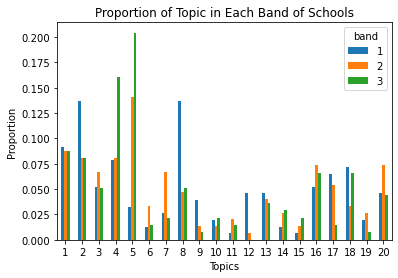

In [42]:
import matplotlib.pyplot as plt

barplot = band_t1.transpose().plot.bar(rot=0)
plt.title("Proportion of Topic in Each Band of Schools")
plt.legend(title = "band")
plt.xlabel("Topics")
plt.ylabel("Proportion")

In [43]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(band_t)
print("Chi square",stat,"p-value",p)

Chi square 71.90075730284728 p-value 0.0007328139089035733


In [44]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(4, 5, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [45]:
tfidf_feature_names = vect.get_feature_names()
n_top_words = 20

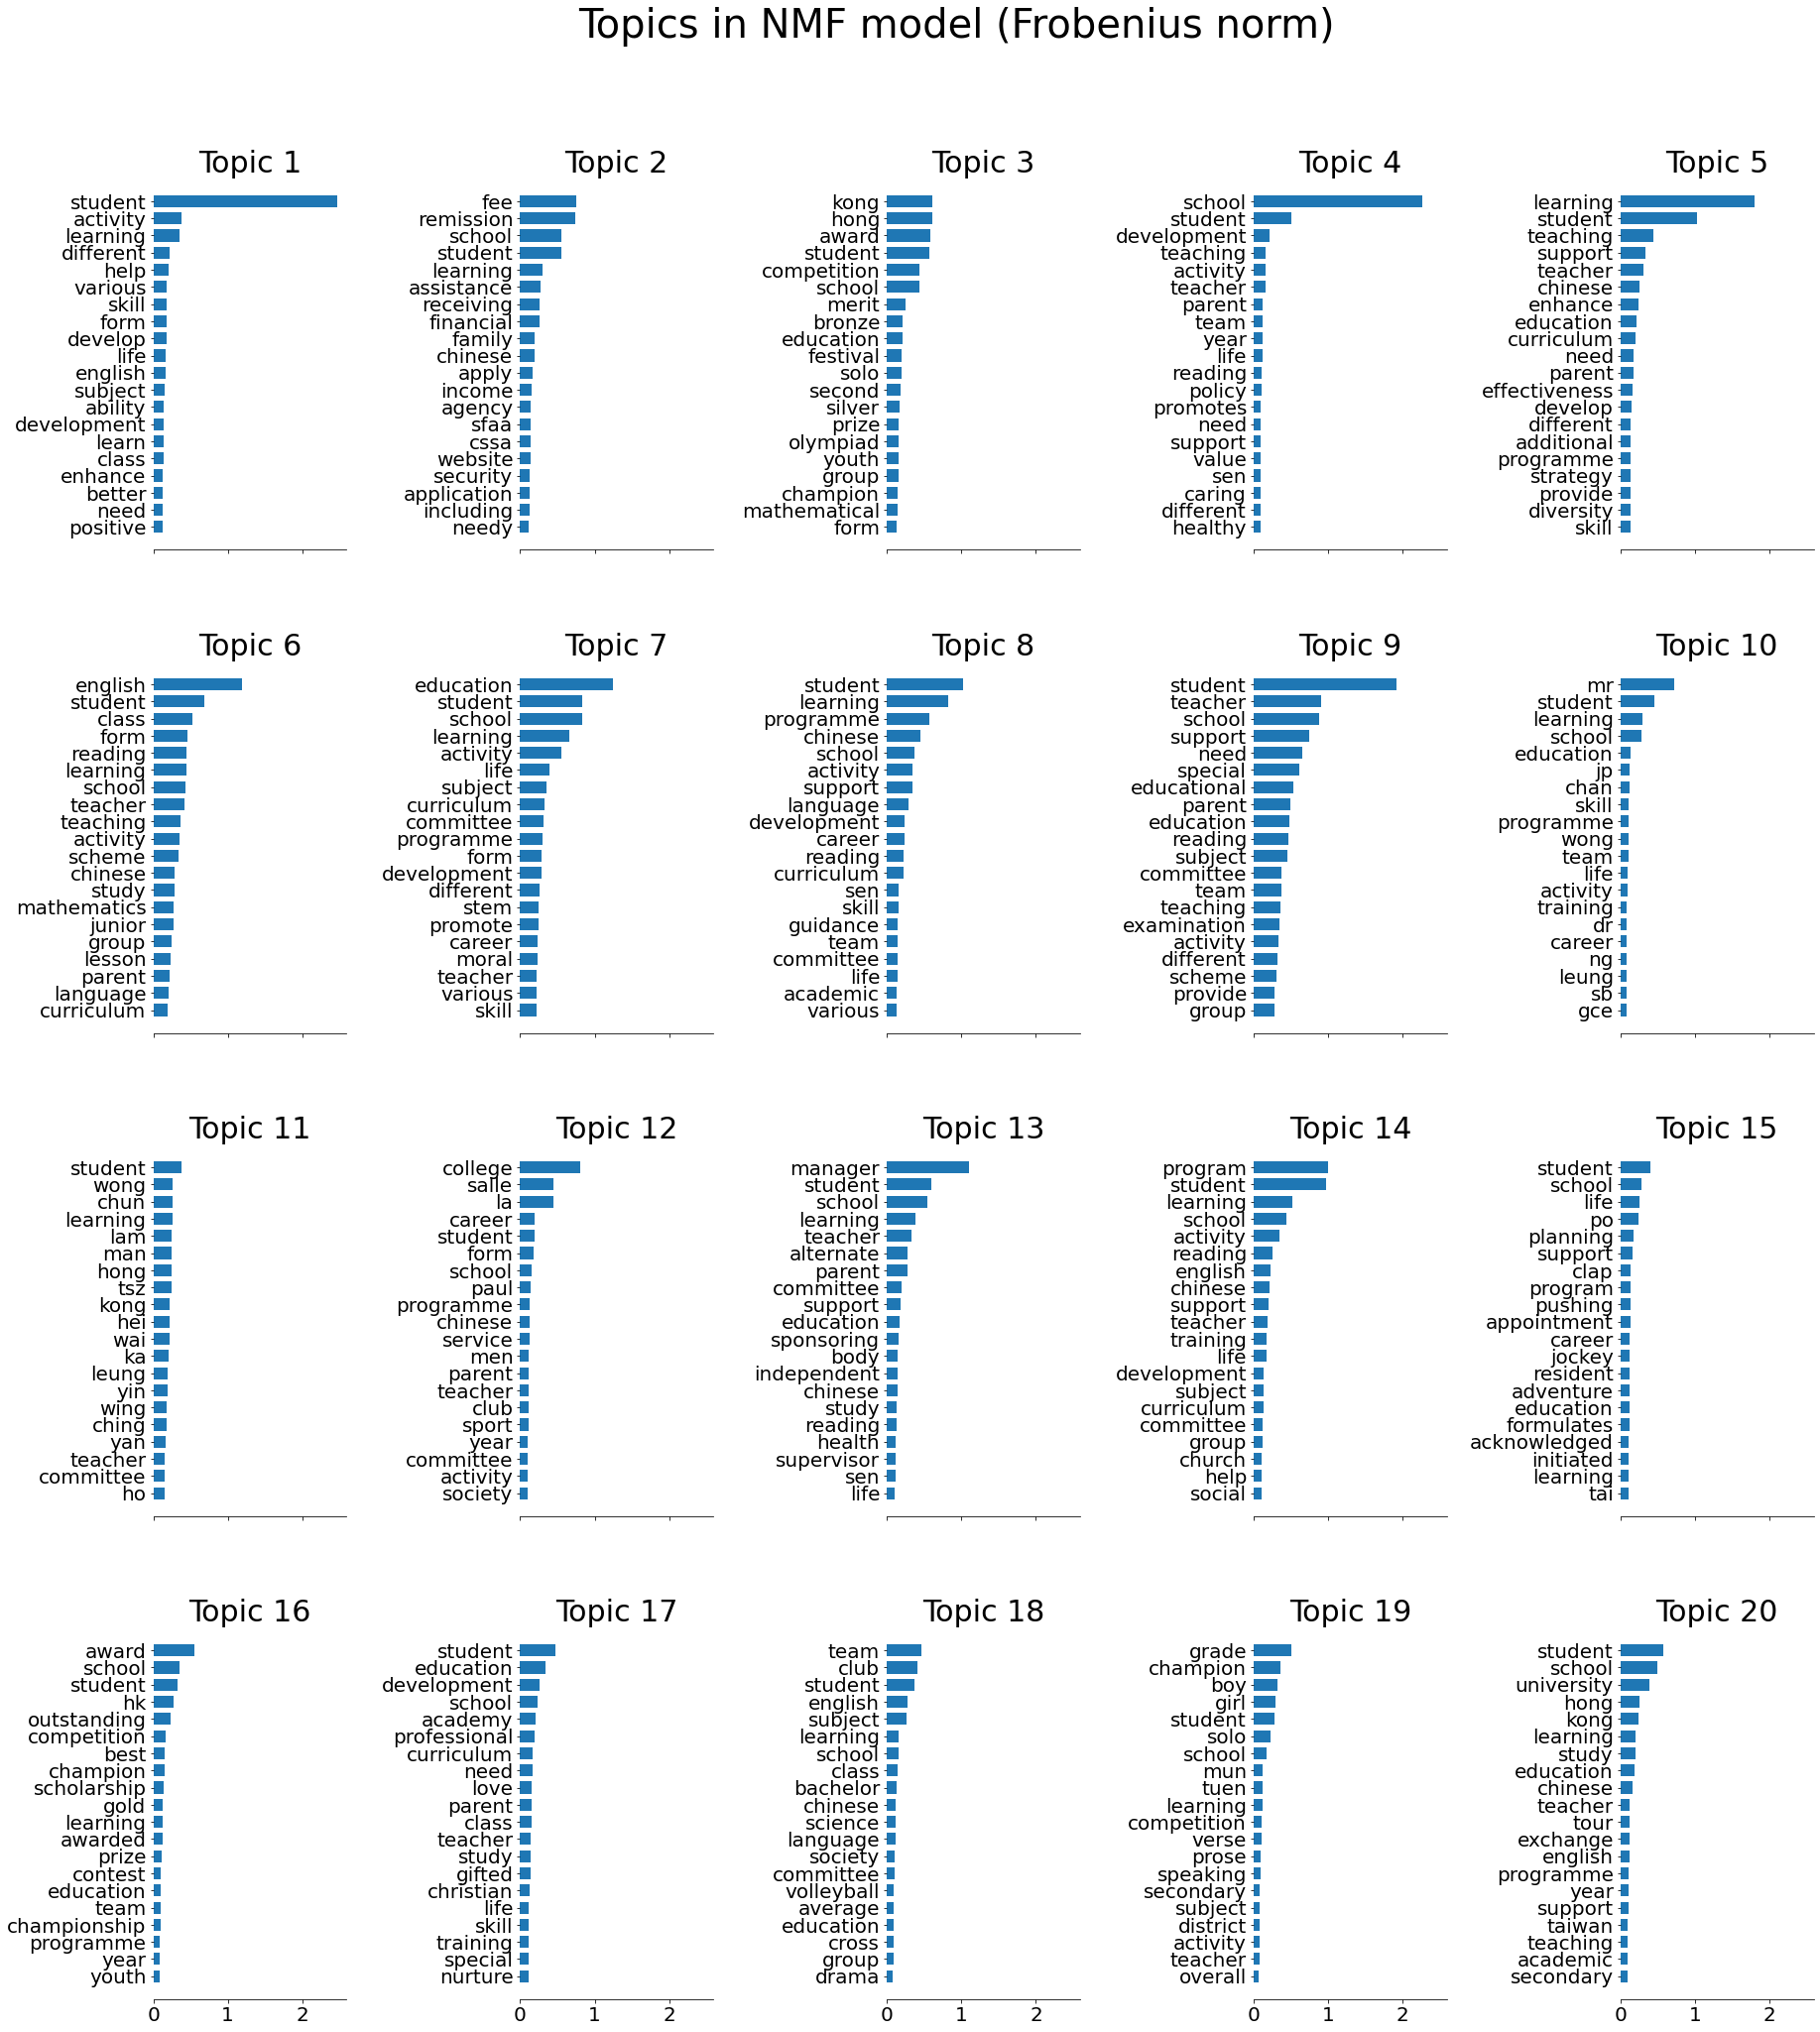

In [46]:
plot_top_words(
    model, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

In [47]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

In [99]:
import pyLDAvis.sklearn
nmf_vis_data = pyLDAvis.sklearn.prepare(model, X, vect)
pyLDAvis.display(nmf_vis_data)

C:\Users\hs_ch\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
